In [52]:
# ! pip install pandas numpy matplotlib seaborn tensorflow keras scikit-learn
! pip install seaborn 



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_csv('US_Accidents_March23.csv')
df.head()

MemoryError: Unable to allocate 128. KiB for an array with shape (16384,) and data type int64

In [6]:
df.dtypes

ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

In [ ]:
df.describe()

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  7.728394e+06  7.728394e+06  7.728394e+06  4.325632e+06  4.325632e+06   
mean   2.212384e+00  3.620119e+01 -9.470255e+01  3.626183e+01 -9.572557e+01   
std    4.875313e-01  5.076079e+00  1.739176e+01  5.272905e+00  1.810793e+01   
min    1.000000e+00  2.455480e+01 -1.246238e+02  2.456601e+01 -1.245457e+02   
25%    2.000000e+00  3.339963e+01 -1.172194e+02  3.346207e+01 -1.177543e+02   
50%    2.000000e+00  3.582397e+01 -8.776662e+01  3.618349e+01 -8.802789e+01   
75%    2.000000e+00  4.008496e+01 -8.035368e+01  4.017892e+01 -8.024709e+01   
max    4.000000e+00  4.900220e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)  Temperature(F)  Wind_Chill(F)   Humidity(%)  \
count  7.728394e+06    7.564541e+06   5.729375e+06  7.554250e+06   
mean   5.618423e-01    6.166329e+01   5.825105e+01  6.483104e+01   
std    1.776811e+00    1.901365e+01   2.238983e+01  2.282097e+01   
min    0.000000e+00   -8.900000e+01  -8.900000e+01  1.000000e+00   
25%    0.000000e+00    4.900000e+01   4.300000e+01  4.800000e+01   
50%    3.000000e-02    6.400000e+01   6.200000e+01  6.700000e+01   
75%    4.640000e-01    7.600000e+01   7.500000e+01  8.400000e+01   
max    4.417500e+02    2.070000e+02   2.070000e+02  1.000000e+02   

       Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  
count  7.587715e+06    7.551296e+06     7.157161e+06       5.524808e+06  
mean   2.953899e+01    9.090376e+00     7.685490e+00       8.407210e-03  
std    1.006190e+00    2.688316e+00     5.424983e+00       1.102246e-01  
min    0.000000e+00    0.000000e+00     0.000000e+00       0.000000e+00  
25%    2.937000e+01    1.000000e+01     4.600000e+00       0.000000e+00  
50%    2.986000e+01    1.000000e+01     7.000000e+00       0.000000e+00  
75%    3.003000e+01    1.000000e+01     1.040000e+01       0.000000e+00  
max    5.863000e+01    1.400000e+02     1.087000e+03       3.647000e+01

In [ ]:
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [ ]:
# now we will try to eliminate the columns that have more than 50% of missing values
# FOR THIS LET GET THE COUNT OF THE MISSING VALUES
missingvalues = df.isna().sum()
missingvalues = missingvalues/ len(df) * 100
missingvalues

ID                        0.000000
Source                    0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                  44.029355
End_Lng                  44.029355
Distance(mi)              0.000000
Description               0.000065
Street                    0.140637
City                      0.003274
County                    0.000000
State                     0.000000
Zipcode                   0.024779
Country                   0.000000
Timezone                  0.101030
Airport_Code              0.292881
Weather_Timestamp         1.555666
Temperature(F)            2.120143
Wind_Chill(F)            25.865904
Humidity(%)               2.253301
Pressure(in)              1.820288
Visibility(mi)            2.291524
Wind_Direction            2.267043
Wind_Speed(mph)           7.391355
Precipitation(in)        28.512858
Weather_Condition   

In [10]:
#according to the reading we can see the End_lat and End_Lng have 50% missing values and so we will eleminate them.
df = df.drop(columns = ['End_Lat', 'End_Lng'])

In [11]:
# now i will try to fill the missing values of the columns that have less than 50% missing values with mean value of that column.

df['Precipitation(in)'] = df['Precipitation(in)'].fillna(df['Precipitation(in)'].mean())
df['Wind_Chill(F)']= df['Wind_Chill(F)'].fillna(df['Wind_Chill(F)'].mean())
df['Wind_Speed(mph)']=df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].mean())

In [12]:
# for necxt, the column near to the missing value of count 2%, we will drop the rows that have missing values.
df = df.dropna(subset = ['Street', 'City', 'Zipcode', 'Timezone', 'Airport_Code','Description',
       'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Weather_Condition',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'])

In [13]:
#transforming Dates to datetime
df['Start_Time'] =pd.to_datetime(df['Start_Time'].str.split('.').str[0])
df['End_Time'] =pd.to_datetime(df['End_Time'].str.split('.').str[0])

In [ ]:
df.isna().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
T

In [ ]:
df.describe()

Severity                     Start_Time  \
count  7.426729e+06                        7426729   
mean   2.211709e+00  2020-05-30 10:03:01.931373312   
min    1.000000e+00            2016-01-14 20:18:33   
25%    2.000000e+00            2018-11-17 10:42:46   
50%    2.000000e+00            2020-11-06 16:04:00   
75%    2.000000e+00            2022-01-15 17:34:30   
max    4.000000e+00            2023-03-31 23:30:00   
std    4.858667e-01                            NaN   

                            End_Time     Start_Lat     Start_Lng  \
count                        7426729  7.426729e+06  7.426729e+06   
mean   2020-05-30 17:15:18.319444480  3.618802e+01 -9.472292e+01   
min              2016-02-08 06:37:08  2.455480e+01 -1.246238e+02   
25%              2018-11-17 12:26:41  3.338563e+01 -1.172260e+02   
50%              2020-11-06 22:31:30  3.579445e+01 -8.779912e+01   
75%              2022-01-16 14:39:33  4.009891e+01 -8.038203e+01   
max              2023-03-31 23:59:00  4.900220e+01 -6.711317e+01   
std                              NaN  5.093016e+00  1.736791e+01   

       Distance(mi)  Temperature(F)  Wind_Chill(F)   Humidity(%)  \
count  7.426729e+06    7.426729e+06   7.426729e+06  7.426729e+06   
mean   5.536382e-01    6.168757e+01   5.827899e+01  6.485706e+01   
min    0.000000e+00   -4.500000e+01  -6.300000e+01  1.000000e+00   
25%    0.000000e+00    4.900000e+01   5.100000e+01  4.800000e+01   
50%    2.700000e-02    6.400000e+01   5.825105e+01  6.700000e+01   
75%    4.540000e-01    7.600000e+01   7.200000e+01  8.400000e+01   
max    4.417500e+02    1.960000e+02   1.960000e+02  1.000000e+02   
std    1.756155e+00    1.897830e+01   1.951701e+01  2.280358e+01   

       Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  
count  7.426729e+06    7.426729e+06     7.426729e+06       7.426729e+06  
mean   2.954286e+01    9.092779e+00     7.690844e+00       8.127311e-03  
min    0.000000e+00    0.000000e+00     0.000000e+00       0.000000e+00  
25%    2.937000e+01    1.000000e+01     4.600000e+00       0.000000e+00  
50%    2.986000e+01    1.000000e+01     7.000000e+00       0.000000e+00  
75%    3.003000e+01    1.000000e+01     1.000000e+01       8.407210e-03  
max    5.863000e+01    1.400000e+02     1.087000e+03       3.647000e+01  
std    9.977106e-01    2.678485e+00     5.273750e+00       7.759773e-02

In [ ]:
df.head()

ID   Source  Severity          Start_Time            End_Time  Start_Lat  \
0  A-1  Source2         3 2016-02-08 05:46:00 2016-02-08 11:00:00  39.865147   
1  A-2  Source2         2 2016-02-08 06:07:59 2016-02-08 06:37:59  39.928059   
2  A-3  Source2         2 2016-02-08 06:49:27 2016-02-08 07:19:27  39.063148   
3  A-4  Source2         3 2016-02-08 07:23:34 2016-02-08 07:53:34  39.747753   
4  A-5  Source2         2 2016-02-08 07:39:07 2016-02-08 08:09:07  39.627781   

   Start_Lng  Distance(mi)                                        Description  \
0 -84.058723          0.01  Right lane blocked due to accident on I-70 Eas...   
1 -82.831184          0.01  Accident on Brice Rd at Tussing Rd. Expect del...   
2 -84.032608          0.01  Accident on OH-32 State Route 32 Westbound at ...   
3 -84.205582          0.01  Accident on I-75 Southbound at Exits 52 52B US...   
4 -84.188354          0.01  Accident on McEwen Rd at OH-725 Miamisburg Cen...   

                      Street  ... Roundabout Station   Stop Traffic_Calming  \
0                     I-70 E  ...      False   False  False           False   
1                   Brice Rd  ...      False   False  False           False   
2             State Route 32  ...      False   False  False           False   
3                     I-75 S  ...      False   False  False           False   
4  Miamisburg Centerville Rd  ...      False   False  False           False   

  Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \
0          False        False          Night          Night   
1          False        False          Night          Night   
2           True        False          Night          Night   
3          False        False          Night            Day   
4           True        False            Day            Day   

   Nautical_Twilight  Astronomical_Twilight  
0              Night                  Night  
1              Night                    Day  
2                Day                    Day  
3                Day                    Day  
4                Day                    Day  

[5 rows x 44 columns]

In [17]:
#Add day's column in our data.
df['day'] = df['Start_Time'].dt.day
#Add Week_day column in the data.
df['weekday'] = df['Start_Time'].dt.weekday
#Add Month column in the data.
df['month'] = df['Start_Time'].dt.month
#Add Hour column in the data.
df['hour'] = df['Start_Time'].dt.hour

In [ ]:
df.head()

ID   Source  Severity          Start_Time            End_Time  Start_Lat  \
0  A-1  Source2         3 2016-02-08 05:46:00 2016-02-08 11:00:00  39.865147   
1  A-2  Source2         2 2016-02-08 06:07:59 2016-02-08 06:37:59  39.928059   
2  A-3  Source2         2 2016-02-08 06:49:27 2016-02-08 07:19:27  39.063148   
3  A-4  Source2         3 2016-02-08 07:23:34 2016-02-08 07:53:34  39.747753   
4  A-5  Source2         2 2016-02-08 07:39:07 2016-02-08 08:09:07  39.627781   

   Start_Lng  Distance(mi)                                        Description  \
0 -84.058723          0.01  Right lane blocked due to accident on I-70 Eas...   
1 -82.831184          0.01  Accident on Brice Rd at Tussing Rd. Expect del...   
2 -84.032608          0.01  Accident on OH-32 State Route 32 Westbound at ...   
3 -84.205582          0.01  Accident on I-75 Southbound at Exits 52 52B US...   
4 -84.188354          0.01  Accident on McEwen Rd at OH-725 Miamisburg Cen...   

                      Street  ... Traffic_Signal Turning_Loop Sunrise_Sunset  \
0                     I-70 E  ...          False        False          Night   
1                   Brice Rd  ...          False        False          Night   
2             State Route 32  ...           True        False          Night   
3                     I-75 S  ...          False        False          Night   
4  Miamisburg Centerville Rd  ...           True        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight day weekday  month  \
0          Night             Night                 Night   8       0      2   
1          Night             Night                   Day   8       0      2   
2          Night               Day                   Day   8       0      2   
3            Day               Day                   Day   8       0      2   
4            Day               Day                   Day   8       0      2   

   hour  
0     5  
1     6  
2     6  
3     7  
4     7  

[5 rows x 48 columns]

let see the time at which the accident usually happend the most in US.


explanation: Here we will try to figure out the time that accident occur in the US. this will involve the columns 'Start_time' and 'End_start' 

In [ ]:
# we wil go first for accident per Day of the Month.

Day = df.groupby('day').count()
Day


ID  Source  Severity  Start_Time  End_Time  Start_Lat  Start_Lng  \
day                                                                         
1    238826  238826    238826      238826    238826     238826     238826   
2    235623  235623    235623      235623    235623     235623     235623   
3    233692  233692    233692      233692    233692     233692     233692   
4    233201  233201    233201      233201    233201     233201     233201   
5    238169  238169    238169      238169    238169     238169     238169   
6    239137  239137    239137      239137    239137     239137     239137   
7    238778  238778    238778      238778    238778     238778     238778   
8    239571  239571    239571      239571    239571     239571     239571   
9    238733  238733    238733      238733    238733     238733     238733   
10   237980  237980    237980      237980    237980     237980     237980   
11   252088  252088    252088      252088    252088     252088     252088   
12   256346  256346    256346      256346    256346     256346     256346   
13   253535  253535    253535      253535    253535     253535     253535   
14   255147  255147    255147      255147    255147     255147     255147   
15   253786  253786    253786      253786    253786     253786     253786   
16   254607  254607    254607      254607    254607     254607     254607   
17   247432  247432    247432      247432    247432     247432     247432   
18   253247  253247    253247      253247    253247     253247     253247   
19   253720  253720    253720      253720    253720     253720     253720   
20   251784  251784    251784      251784    251784     251784     251784   
21   253764  253764    253764      253764    253764     253764     253764   
22   266014  266014    266014      266014    266014     266014     266014   
23   265949  265949    265949      265949    265949     265949     265949   
24   241231  241231    241231      241231    241231     241231     241231   
25   223760  223760    223760      223760    223760     223760     223760   
26   228363  228363    228363      228363    228363     228363     228363   
27   238816  238816    238816      238816    238816     238816     238816   
28   231275  231275    231275      231275    231275     231275     231275   
29   214285  214285    214285      214285    214285     214285     214285   
30   221719  221719    221719      221719    221719     221719     221719   
31   136151  136151    136151      136151    136151     136151     136151   

     Distance(mi)  Description  Street  ...  Traffic_Calming  Traffic_Signal  \
day                                     ...                                    
1          238826       238826  238826  ...           238826          238826   
2          235623       235623  235623  ...           235623          235623   
3          233692       233692  233692  ...           233692          233692   
4          233201       233201  233201  ...           233201          233201   
5          238169       238169  238169  ...           238169          238169   
6          239137       239137  239137  ...           239137          239137   
7          238778       238778  238778  ...           238778          238778   
8          239571       239571  239571  ...           239571          239571   
9          238733       238733  238733  ...           238733          238733   
10         237980       237980  237980  ...           237980          237980   
11         252088       252088  252088  ...           252088          252088   
12         256346       256346  256346  ...           256346          256346   
13         253535       253535  253535  ...           253535          253535   
14         255147       255147  255147  ...           255147          255147   
15         253786       253786  253786  ...           253786          253786   
16         254607       254607  254607  ...           254607          254607   
17         247432       247

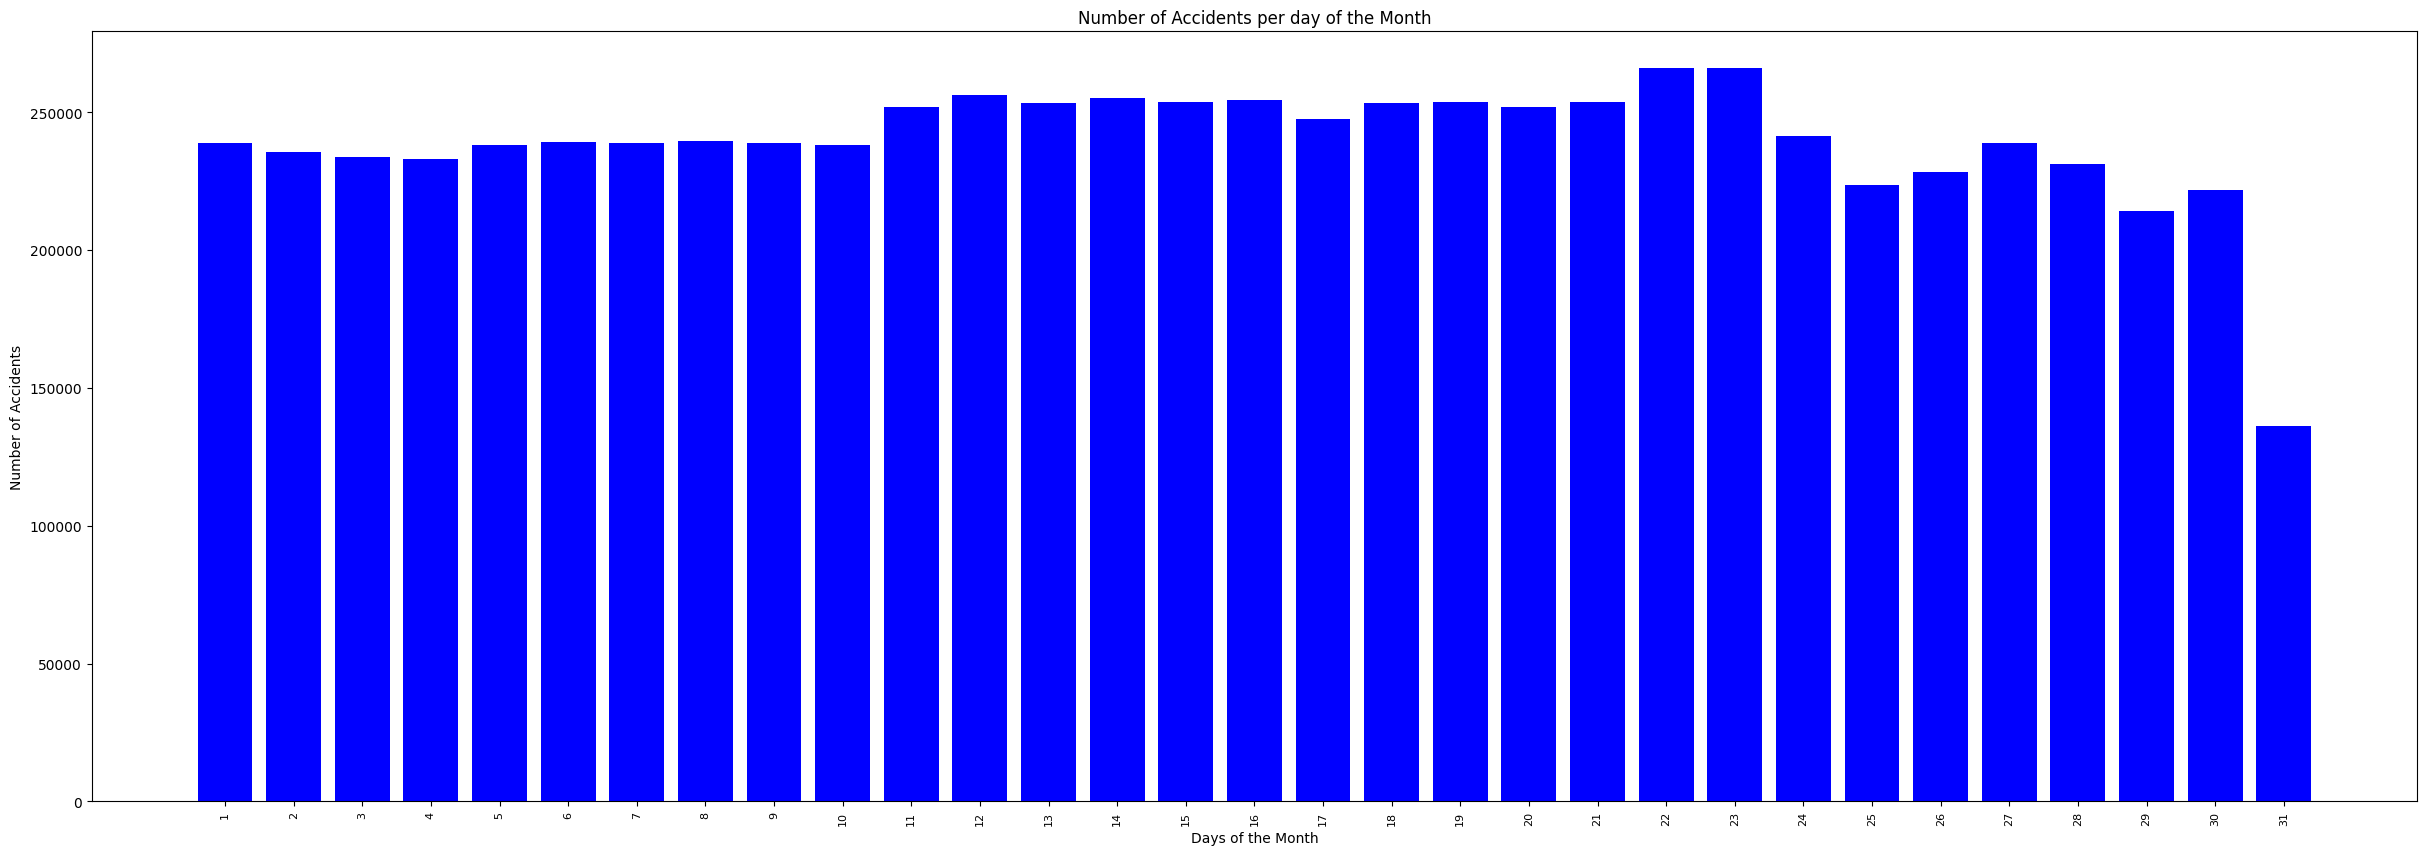

In [ ]:
# ploting a bar graph for the same 

plt.figure(figsize=(30, 10))
plt.title('Number of Accidents per day of the Month')
plt.bar(Day.index, Day.ID, color='b')
plt.xlabel('Days of the Month')
plt.ylabel('Number of Accidents')
plt.xticks(Day.index, rotation='vertical', size=8)
plt.show()

In [21]:
# printing the day of the month when most accident took place.

print('The Day of the Month when accidents usually occur the Most in the US? : ',Day.ID.idxmax())

The Day of the Month when accidents usually occur the Most in the US? :  22


In [ ]:
# now we wil study for accident per week of the Month. we will take similar step as for day per month

Week = df.groupby('weekday').count()
Week

ID   Source  Severity  Start_Time  End_Time  Start_Lat  \
weekday                                                                
0        1165408  1165408   1165408     1165408   1165408    1165408   
1        1243877  1243877   1243877     1243877   1243877    1243877   
2        1265075  1265075   1265075     1265075   1265075    1265075   
3        1268564  1268564   1268564     1268564   1268564    1268564   
4        1314591  1314591   1314591     1314591   1314591    1314591   
5         637784   637784    637784      637784    637784     637784   
6         531430   531430    531430      531430    531430     531430   

         Start_Lng  Distance(mi)  Description   Street  ...  Traffic_Calming  \
weekday                                                 ...                    
0          1165408       1165408      1165408  1165408  ...          1165408   
1          1243877       1243877      1243877  1243877  ...          1243877   
2          1265075       1265075      1265075  1265075  ...          1265075   
3          1268564       1268564      1268564  1268564  ...          1268564   
4          1314591       1314591      1314591  1314591  ...          1314591   
5           637784        637784       637784   637784  ...           637784   
6           531430        531430       531430   531430  ...           531430   

         Traffic_Signal  Turning_Loop  Sunrise_Sunset  Civil_Twilight  \
weekday                                                                 
0               1165408       1165408         1165408         1165408   
1               1243877       1243877         1243877         1243877   
2               1265075       1265075         1265075         1265075   
3               1268564       1268564         1268564         1268564   
4               1314591       1314591         1314591         1314591   
5                637784        637784          637784          637784   
6                531430        531430          531430          531430   

         Nautical_Twilight  Astronomical_Twilight      day    month     hour  
weekday                                                                       
0                  1165408                1165408  1165408  1165408  1165408  
1                  1243877                1243877  1243877  1243877  1243877  
2                  1265075                1265075  1265075  1265075  1265075  
3                  1268564                1268564  1268564  1268564  1268564  
4                  1314591                1314591  1314591  1314591  1314591  
5                   637784                 637784   637784   637784   637784  
6                   531430                 531430   531430   531430   531430  

[7 rows x 47 columns]

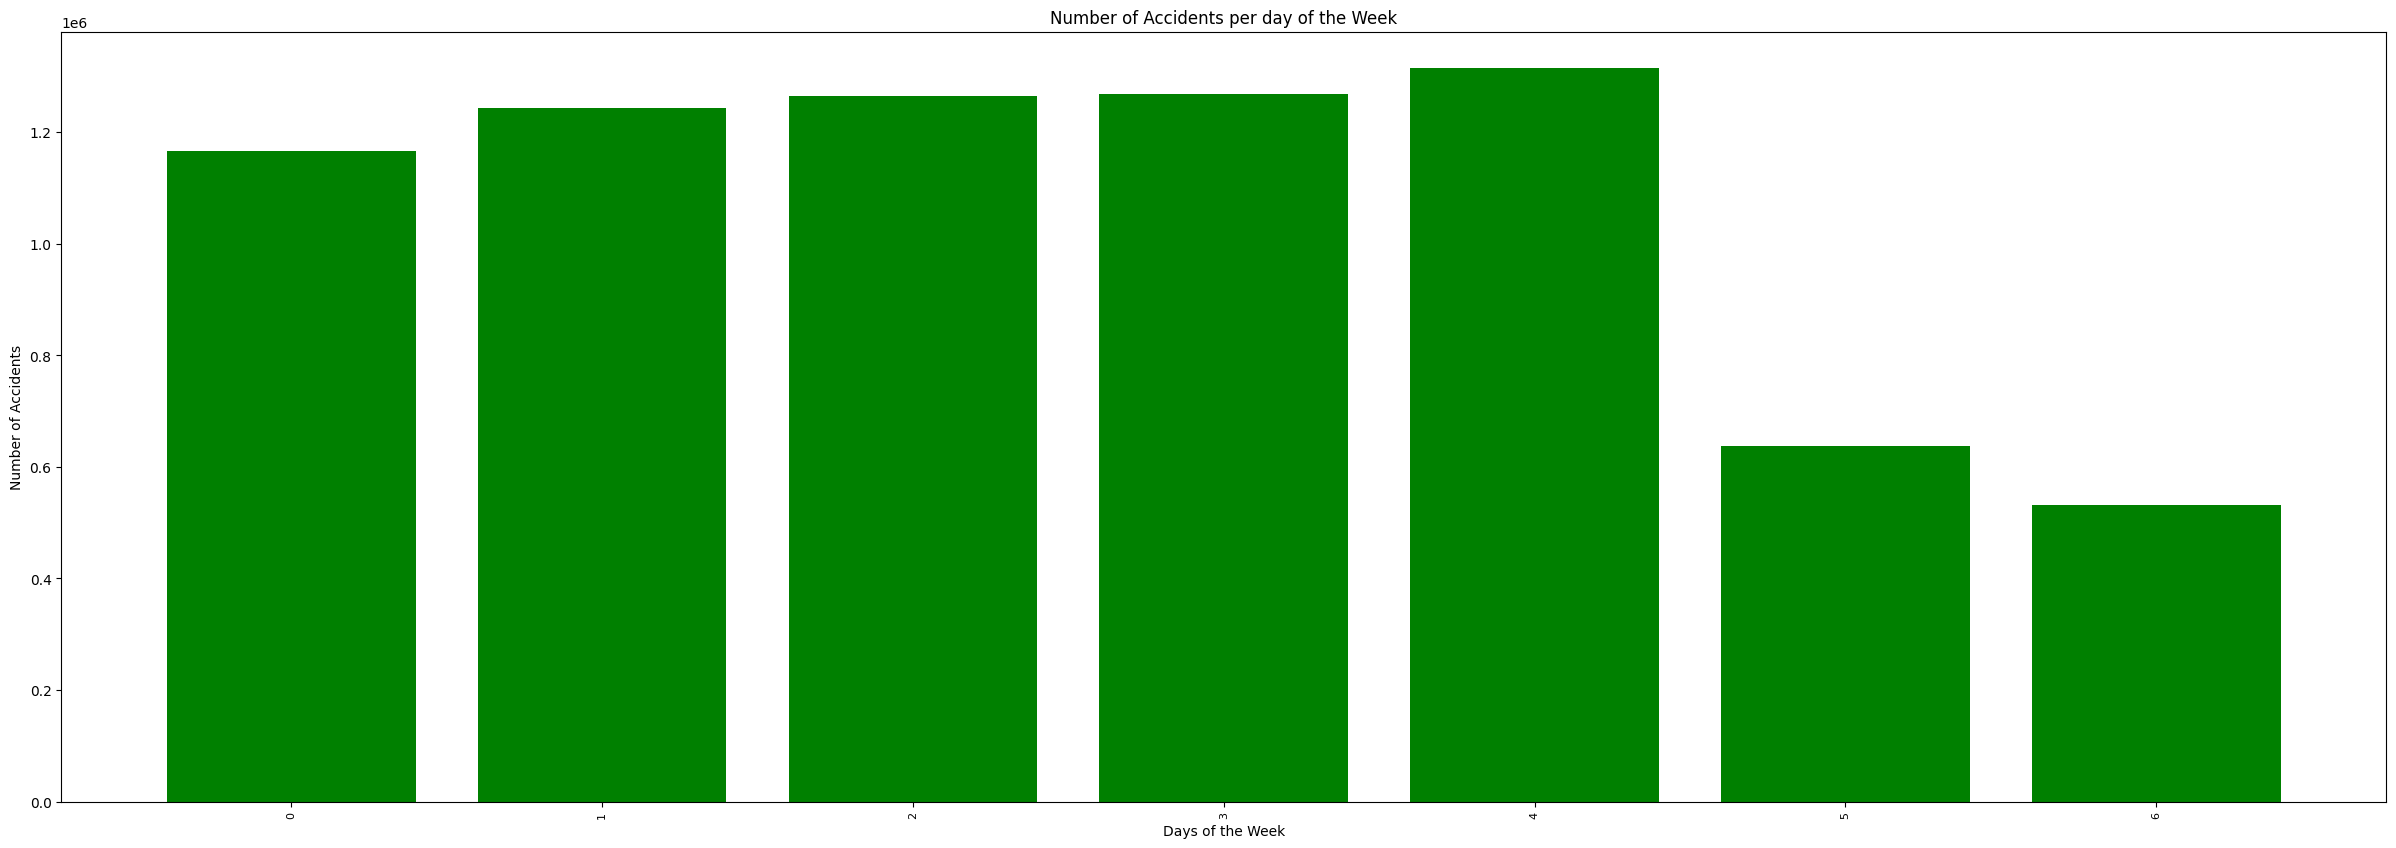

In [ ]:
plt.figure(figsize=(30, 10))
plt.title('Number of Accidents per day of the Week')
plt.bar(Week.index, Week.ID, color='g')
plt.xlabel('Days of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(Week.index, rotation='vertical', size=8)
plt.show()

In [24]:
print('The Weekday when accidents usually occur the Most in the US? : ',Week.ID.idxmax())

The Weekday when accidents usually occur the Most in the US? :  4


In [ ]:
# we will study for accident per hours of the day. similar process as before.

Hours = df.groupby('hour').count()
Hours

ID  Source  Severity  Start_Time  End_Time  Start_Lat  Start_Lng  \
hour                                                                         
0     106394  106394    106394      106394    106394     106394     106394   
1      91962   91962     91962       91962     91962      91962      91962   
2      88297   88297     88297       88297     88297      88297      88297   
3      79600   79600     79600       79600     79600      79600      79600   
4     152450  152450    152450      152450    152450     152450     152450   
5     217983  217983    217983      217983    217983     217983     217983   
6     389455  389455    389455      389455    389455     389455     389455   
7     566895  566895    566895      566895    566895     566895     566895   
8     557530  557530    557530      557530    557530     557530     557530   
9     349593  349593    349593      349593    349593     349593     349593   
10    329416  329416    329416      329416    329416     329416     329416   
11    341161  341161    341161      341161    341161     341161     341161   
12    340248  340248    340248      340248    340248     340248     340248   
13    379856  379856    379856      379856    379856     379856     379856   
14    430939  430939    430939      430939    430939     430939     430939   
15    506149  506149    506149      506149    506149     506149     506149   
16    561972  561972    561972      561972    561972     561972     561972   
17    556736  556736    556736      556736    556736     556736     556736   
18    417181  417181    417181      417181    417181     417181     417181   
19    284264  284264    284264      284264    284264     284264     284264   
20    215887  215887    215887      215887    215887     215887     215887   
21    182906  182906    182906      182906    182906     182906     182906   
22    159852  159852    159852      159852    159852     159852     159852   
23    120003  120003    120003      120003    120003     120003     120003   

      Distance(mi)  Description  Street  ...  Traffic_Calming  Traffic_Signal  \
hour                                     ...                                    
0           106394       106394  106394  ...           106394          106394   
1            91962        91962   91962  ...            91962           91962   
2            88297        88297   88297  ...            88297           88297   
3            79600        79600   79600  ...            79600           79600   
4           152450       152450  152450  ...           152450          152450   
5           217983       217983  217983  ...           217983          217983   
6           389455       389455  389455  ...           389455          389455   
7           566895       566895  566895  ...           566895          566895   
8           557530       557530  557530  ...           557530          557530   
9           349593       349593  349593  ...           349593          349593   
10          329416       329416  329416  ...           329416          329416   
11          341161       341161  341161  ...           341161          341161   
12          340248       340248  340248  ...           340248          340248   
13          379856       379856  379856  ...           379856          379856   
14          430939       430939  430939  ...           430939          430939   
15          506149       506149  506149  ...           506149          506149   
16          561972       561972  561972  ...           561972          561972   
17          556736       556736  556736  ...           556736          556736   
18          417181       417181  417181  ...           417181          417181   
19          284264       284264  284264  ...           284264          284264   
20          215887       215887  215887  ...           215887          215887   
21          182906       182906  182906  ...           182906          182906   
22          159852       159852  1598

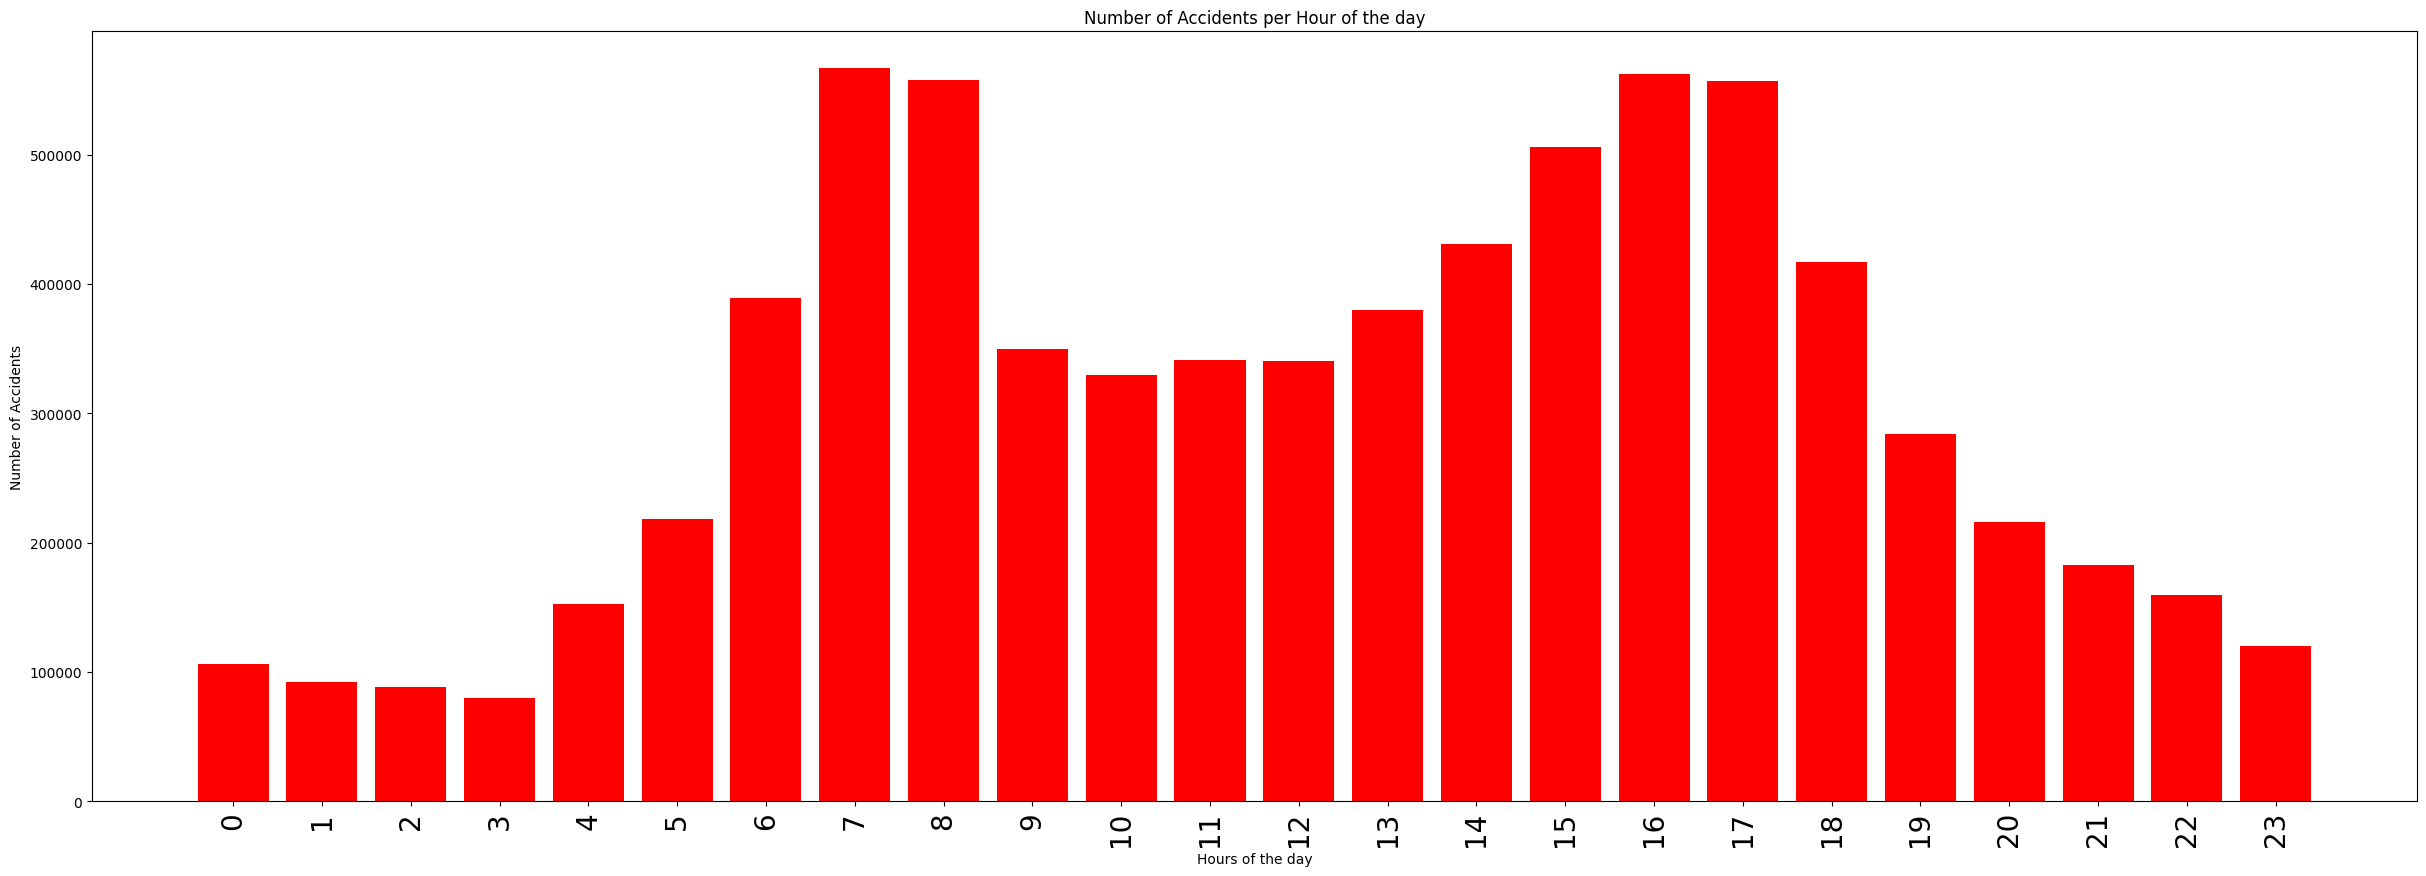

In [ ]:
plt.figure(figsize=(30, 10))
plt.title('Number of Accidents per Hour of the day')
plt.bar(Hours.index, Hours.ID, color='r')
plt.xlabel('Hours of the day')
plt.ylabel('Number of Accidents')
plt.xticks(Hours.index, rotation='vertical', size=20)
plt.show()

In [ ]:
# Lastly for the count of accident per month.

Month = df.groupby('month').count()
Month

ID  Source  Severity  Start_Time  End_Time  Start_Lat  Start_Lng  \
month                                                                         
1      720266  720266    720266      720266    720266     720266     720266   
2      634049  634049    634049      634049    634049     634049     634049   
3      535202  535202    535202      535202    535202     535202     535202   
4      567738  567738    567738      567738    567738     567738     567738   
5      538951  538951    538951      538951    538951     538951     538951   
6      546172  546172    546172      546172    546172     546172     546172   
7      488984  488984    488984      488984    488984     488984     488984   
8      576505  576505    576505      576505    576505     576505     576505   
9      625462  625462    625462      625462    625462     625462     625462   
10     651574  651574    651574      651574    651574     651574     651574   
11     728649  728649    728649      728649    728649     728649     728649   
12     813177  813177    813177      813177    813177     813177     813177   

       Distance(mi)  Description  Street  ...  Traffic_Calming  \
month                                     ...                    
1            720266       720266  720266  ...           720266   
2            634049       634049  634049  ...           634049   
3            535202       535202  535202  ...           535202   
4            567738       567738  567738  ...           567738   
5            538951       538951  538951  ...           538951   
6            546172       546172  546172  ...           546172   
7            488984       488984  488984  ...           488984   
8            576505       576505  576505  ...           576505   
9            625462       625462  625462  ...           625462   
10           651574       651574  651574  ...           651574   
11           728649       728649  728649  ...           728649   
12           813177       813177  813177  ...           813177   

       Traffic_Signal  Turning_Loop  Sunrise_Sunset  Civil_Twilight  \
month                                                                 
1              720266        720266          720266          720266   
2              634049        634049          634049          634049   
3              535202        535202          535202          535202   
4              567738        567738          567738          567738   
5              538951        538951          538951          538951   
6              546172        546172          546172          546172   
7              488984        488984          488984          488984   
8              576505        576505          576505          576505   
9              625462        625462          625462          625462   
10             651574        651574          651574          651574   
11             728649        728649          728649          728649   
12             813177        813177          813177          813177   

       Nautical_Twilight  Astronomical_Twilight     day  weekday    hour  
month                                                                     
1                 720266                 720266  720266   720266  720266  
2                 634049                 634049  634049   634049  634049  
3                 535202                 535202  535202   535202  535202  
4                 567738                 567738  567738   567738  567738  
5                 538951                 538951  538951   538951  538951  
6                 546172                 546172  546172   546172  546172  
7                 488984                 488984  488984   488984  488984  
8                 576505                 576505  576505   576505  576505  
9                 625462                 625462  625462   625462  625462  
10                651574                 651574  651574   651574  651574  
11                728649                 728649  728649   728649  728649  
12       

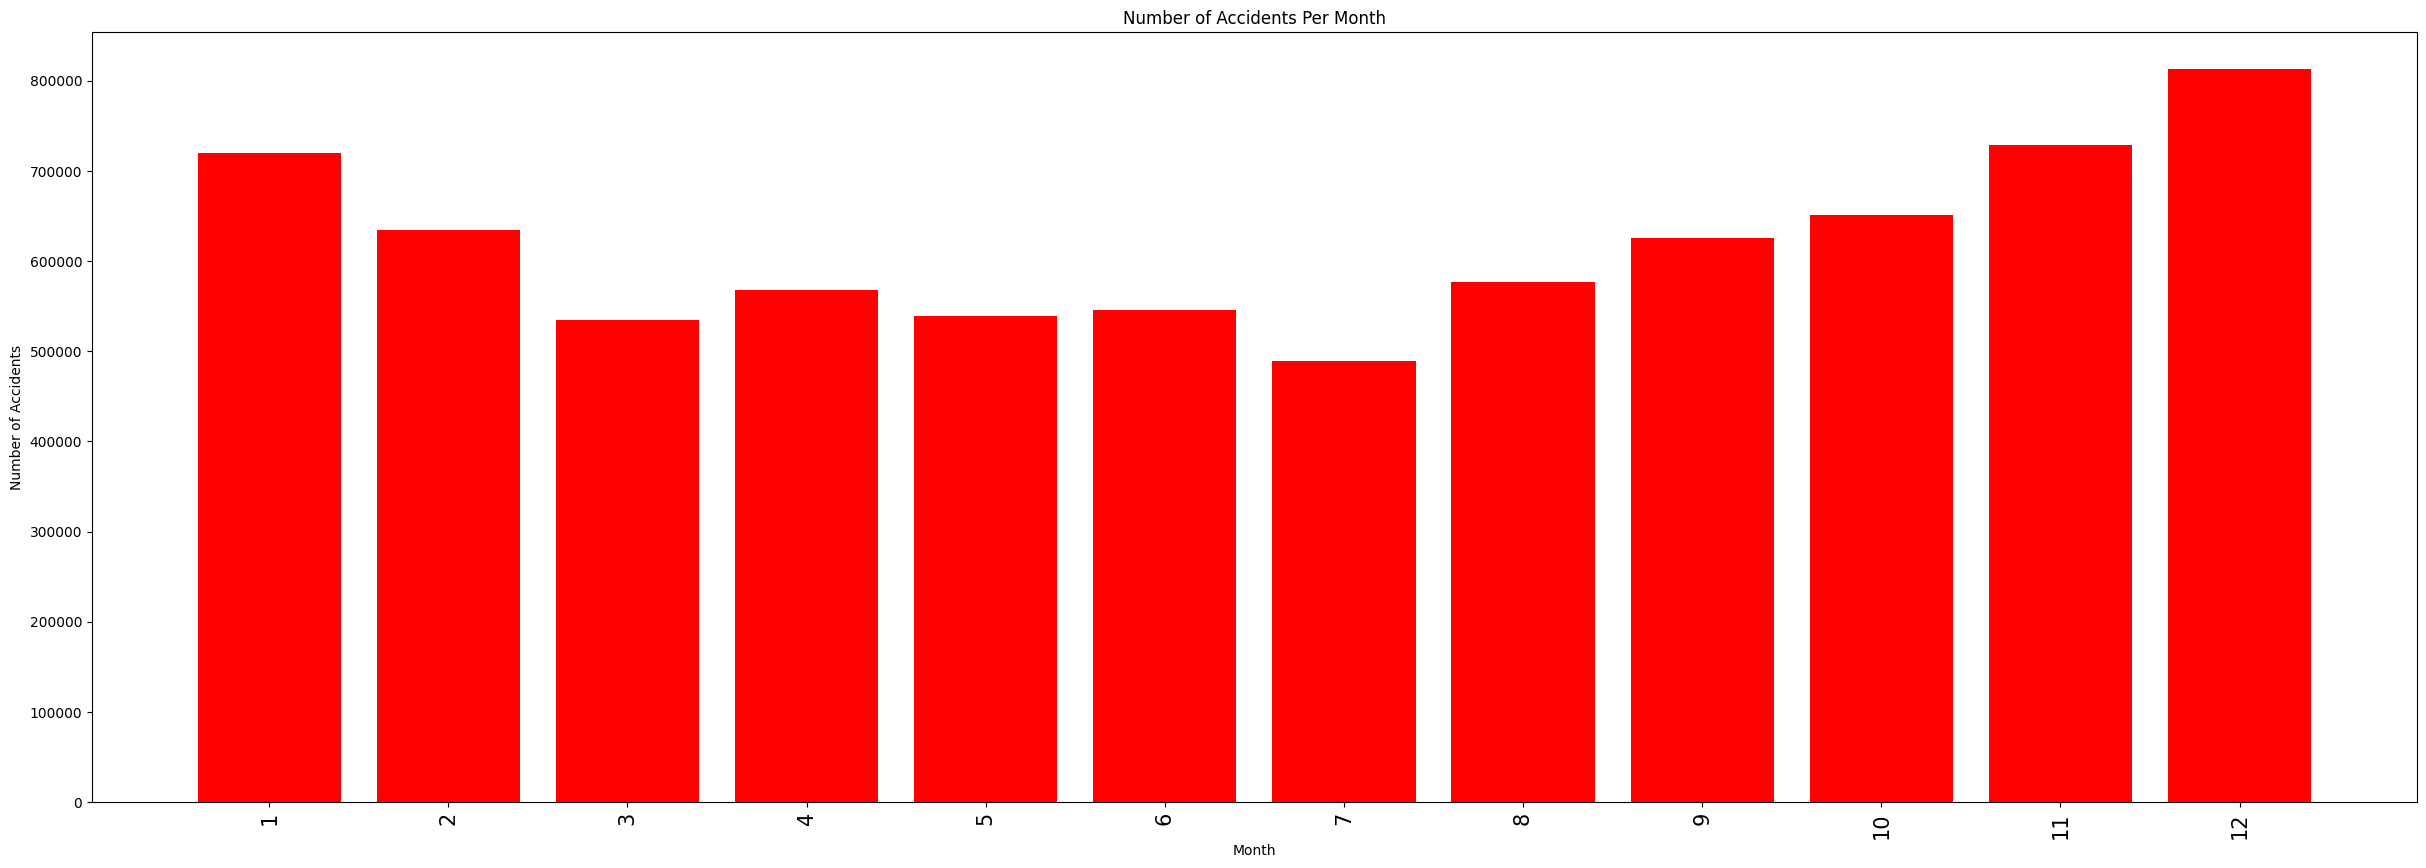

In [ ]:
plt.figure(figsize=(30, 10))
plt.title('Number of Accidents Per Month')
plt.bar(Month.index, Month.ID, color='r')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(Month.index, rotation='vertical', size=15)
plt.show()

In [29]:
print('The Month when accidents usually occur the Most in the US? : ',Month.ID.idxmax())

The Month when accidents usually occur the Most in the US? :  12


Now in DataSet there is a special columns for the weather Condition, so we will try to study the Accident Analysis count due to the weather condition.

In [ ]:
Weather = df.groupby('Weather_Condition').count()
Weather

ID  Source  Severity  Start_Time  End_Time  \
Weather_Condition                                                        
Blowing Dust               187     187       187         187       187   
Blowing Dust / Windy       265     265       265         265       265   
Blowing Sand                 2       2         2           2         2   
Blowing Snow               726     726       726         726       726   
Blowing Snow / Windy       915     915       915         915       915   
...                        ...     ...       ...         ...       ...   
Volcanic Ash                21      21        21          21        21   
Widespread Dust            180     180       180         180       180   
Widespread Dust / Windy     24      24        24          24        24   
Wintry Mix               11519   11519     11519       11519     11519   
Wintry Mix / Windy         329     329       329         329       329   

                         Start_Lat  Start_Lng  Distance(mi)  Description  \
Weather_Condition                                                          
Blowing Dust                   187        187           187          187   
Blowing Dust / Windy           265        265           265          265   
Blowing Sand                     2          2             2            2   
Blowing Snow                   726        726           726          726   
Blowing Snow / Windy           915        915           915          915   
...                            ...        ...           ...          ...   
Volcanic Ash                    21         21            21           21   
Widespread Dust                180        180           180          180   
Widespread Dust / Windy         24         24            24           24   
Wintry Mix                   11519      11519         11519        11519   
Wintry Mix / Windy             329        329           329          329   

                         Street  ...  Traffic_Signal  Turning_Loop  \
Weather_Condition                ...                                 
Blowing Dust                187  ...             187           187   
Blowing Dust / Windy        265  ...             265           265   
Blowing Sand                  2  ...               2             2   
Blowing Snow                726  ...             726           726   
Blowing Snow / Windy        915  ...             915           915   
...                         ...  ...             ...           ...   
Volcanic Ash                 21  ...              21            21   
Widespread Dust             180  ...             180           180   
Widespread Dust / Windy      24  ...              24            24   
Wintry Mix                11519  ...           11519         11519   
Wintry Mix / Windy          329  ...             329           329   

                         Sunrise_Sunset  Civil_Twilight  Nautical_Twilight  \
Weather_Condition                                                            
Blowing Dust                        187             187                187   
Blowing Dust / Windy                265             265                265   
Blowing Sand                          2               2                  2   
Blowing Snow                        726             726                726   
Blowing Snow / Windy                915             915                915   
...                                 ...             ...                ...   
Volcanic Ash                         21              21                 21   
Widespread Dust                     180             180                180   
Widespread Dust / Windy              24              24                 24   
Wintry Mix                        11519           11519              11519   
Wintry Mix / Windy                  329             329                329   

                         Astronomical_Twilight    day  weekday  month   hour  
Weather_Condition                                                      

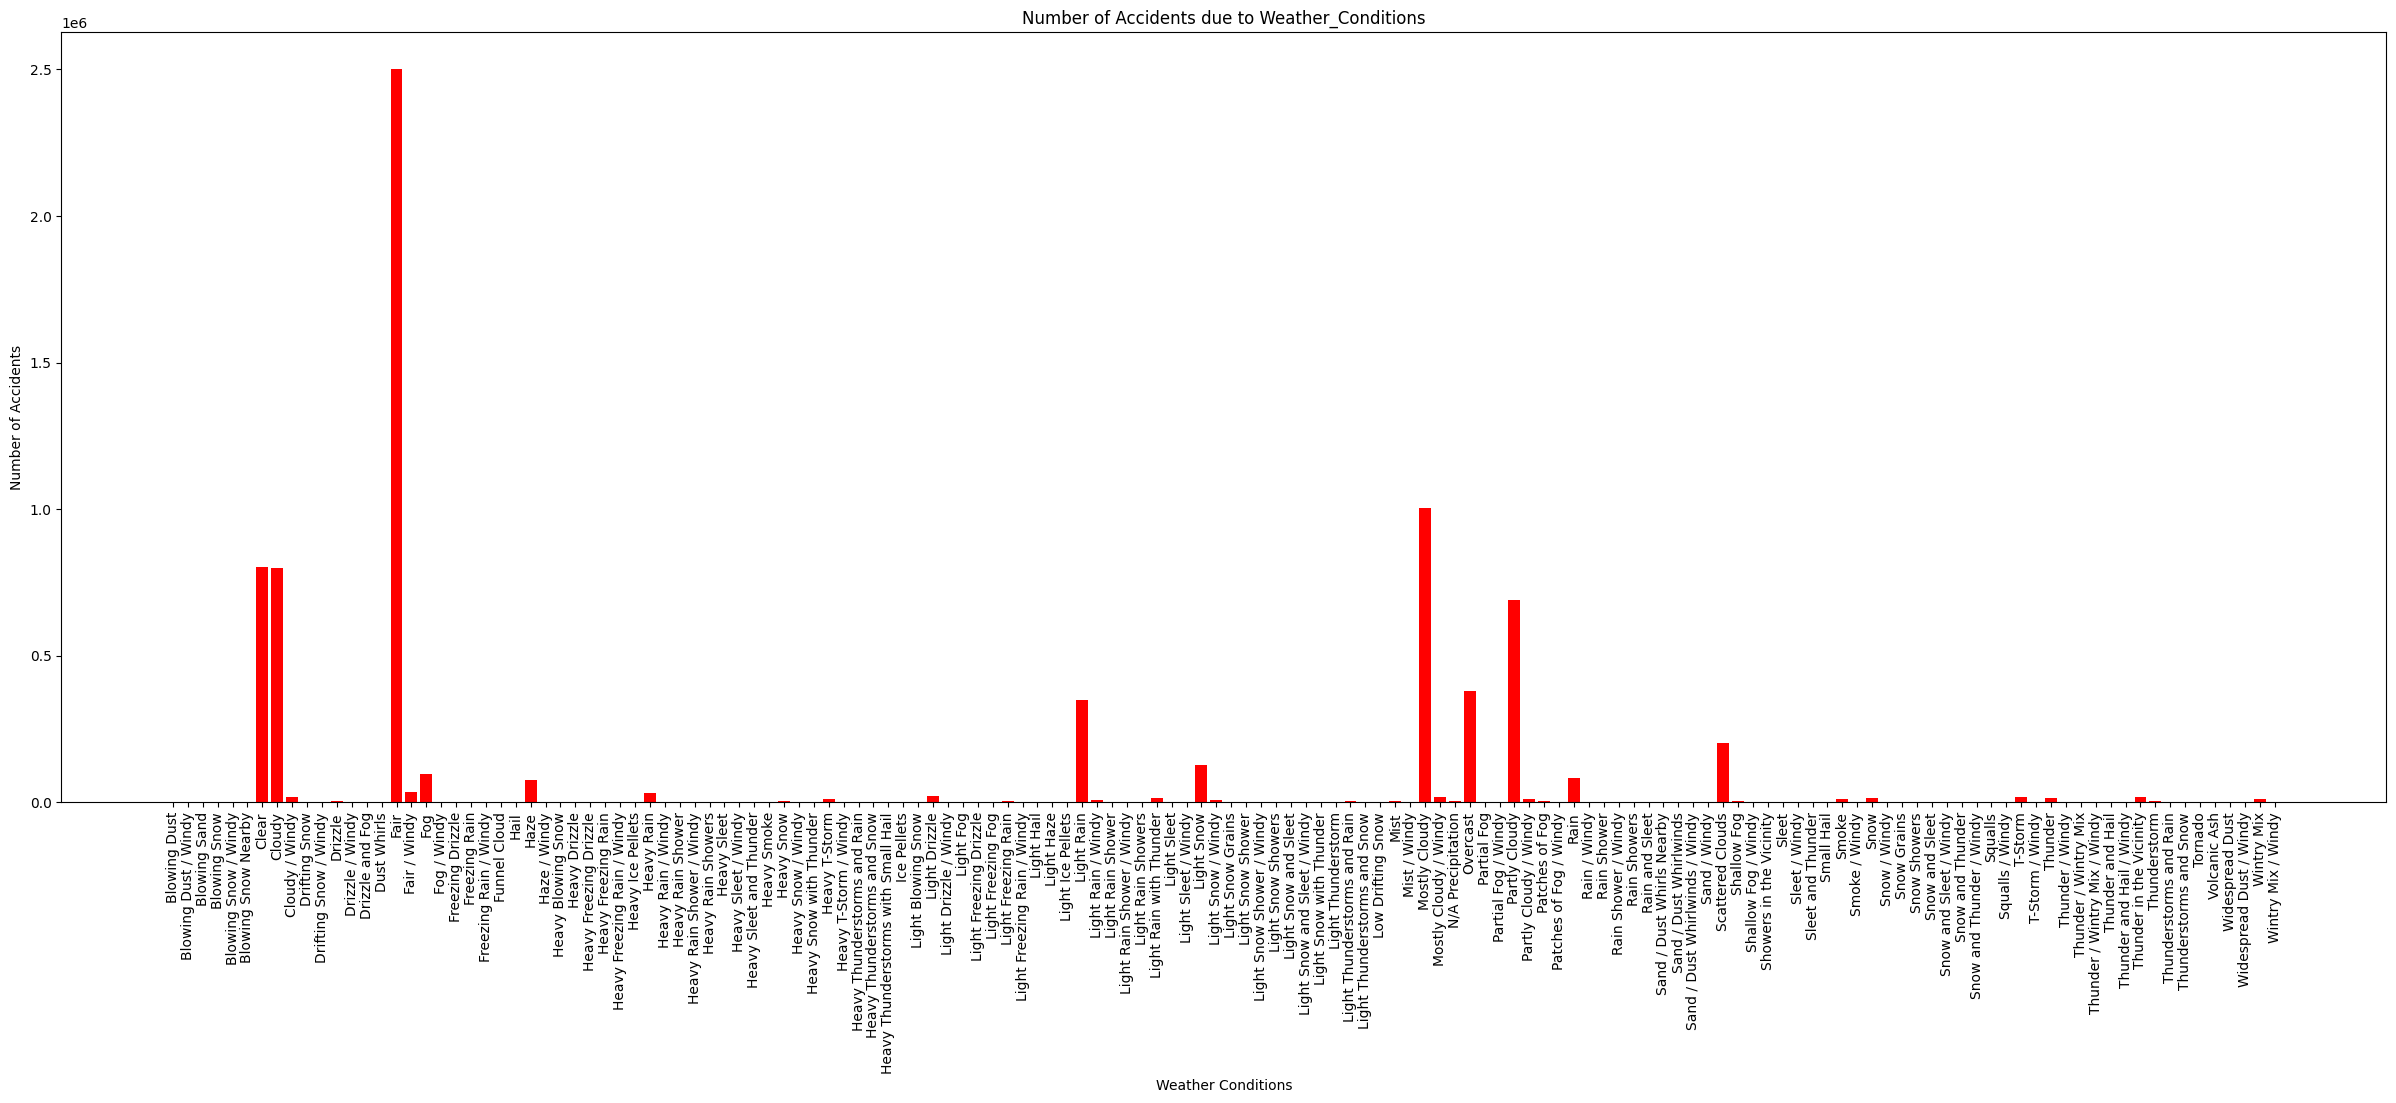

In [ ]:
plt.figure(figsize=(30, 10))
plt.title('Number of Accidents due to Weather_Conditions')
plt.bar(Weather.index, Weather.ID, color='r')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(Weather.index, rotation='vertical', size=10)
plt.show()

Similar to weather condition there is weather direction also, let try to study this column and how it effecting the accidents.

In [ ]:
Direction = df.groupby('Wind_Direction').count()
Direction

ID  Source  Severity  Start_Time  End_Time  Start_Lat  \
Wind_Direction                                                              
CALM            942803  942803    942803      942803    942803     942803   
Calm            362598  362598    362598      362598    362598     362598   
E               274727  274727    274727      274727    274727     274727   
ENE             254938  254938    254938      254938    254938     254938   
ESE             264812  264812    264812      264812    264812     264812   
East            102539  102539    102539      102539    102539     102539   
N               302063  302063    302063      302063    302063     302063   
NE              254648  254648    254648      254648    254648     254648   
NNE             251637  251637    251637      251637    251637     251637   
NNW             328353  328353    328353      328353    328353     328353   
NW              364394  364394    364394      364394    364394     364394   
North           137058  137058    137058      137058    137058     137058   
S               413901  413901    413901      413901    413901     413901   
SE              291134  291134    291134      291134    291134     291134   
SSE             344111  344111    344111      344111    344111     344111   
SSW             379701  379701    379701      379701    379701     379701   
SW              359826  359826    359826      359826    359826     359826   
South           175516  175516    175516      175516    175516     175516   
VAR             247141  247141    247141      247141    247141     247141   
Variable        112077  112077    112077      112077    112077     112077   
W               378400  378400    378400      378400    378400     378400   
WNW             373374  373374    373374      373374    373374     373374   
WSW             348591  348591    348591      348591    348591     348591   
West            162387  162387    162387      162387    162387     162387   

                Start_Lng  Distance(mi)  Description  Street  ...  \
Wind_Direction                                                ...   
CALM               942803        942803       942803  942803  ...   
Calm               362598        362598       362598  362598  ...   
E                  274727        274727       274727  274727  ...   
ENE                254938        254938       254938  254938  ...   
ESE                264812        264812       264812  264812  ...   
East               102539        102539       102539  102539  ...   
N                  302063        302063       302063  302063  ...   
NE                 254648        254648       254648  254648  ...   
NNE                251637        251637       251637  251637  ...   
NNW                328353        328353       328353  328353  ...   
NW                 364394        364394       364394  364394  ...   
North              137058        137058       137058  137058  ...   
S                  413901        413901       413901  413901  ...   
SE                 291134        291134       291134  291134  ...   
SSE                344111        344111       344111  344111  ...   
SSW                379701        379701       379701  379701  ...   
SW                 359826        359826       359826  359826  ...   
South              175516        175516       175516  175516  ...   
VAR                247141        247141       247141  247141  ...   
Variable           112077        112077       112077  112077  ...   
W                  378400        378400       378400  378400  ...   
WNW                373374        373374       373374  373374  ...   
WSW                348591        348591       348591  348591  ...   
West               162387        162387       162387  162387  ...   

                Traffic_Signal  Turning_Loop  Sunrise_Sunset  Civil_Twilight  \
Wind_Direction                                                                 
CALM                    942803        942803          942803  

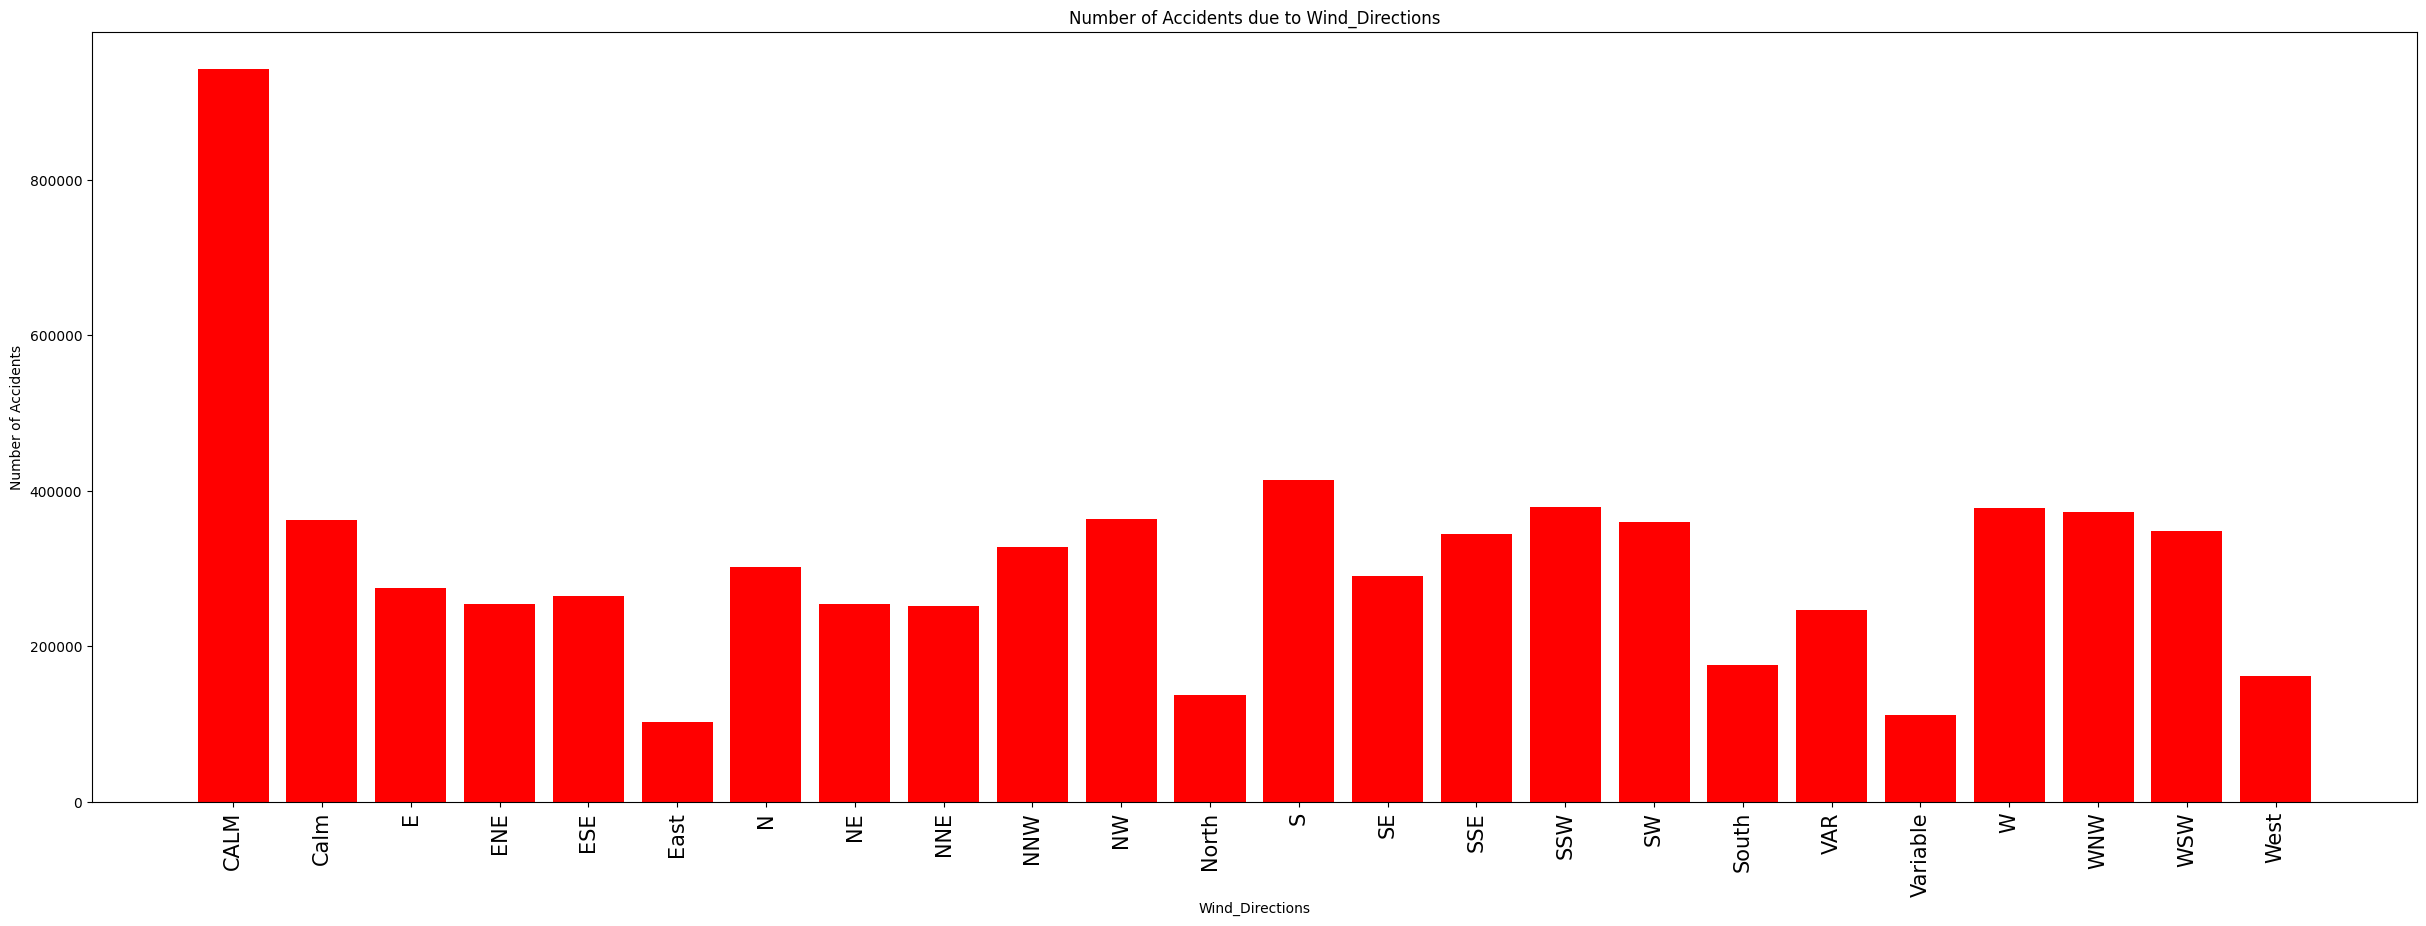

In [ ]:
plt.figure(figsize=(30, 10))
plt.title('Number of Accidents due to Wind_Directions')
plt.bar(Direction.index, Direction.ID, color='r')
plt.xlabel('Wind_Directions')
plt.ylabel('Number of Accidents')
plt.xticks(Direction.index, rotation='vertical', size=15)
plt.show()

In [34]:
print('The Wind_Direction for which accidents usually occur the Most in the US? : ',Direction.ID.idxmax())

The Wind_Direction for which accidents usually occur the Most in the US? :  CALM


Visualizing the US Accident

In [ ]:
# In this sector we will try to Visualize on the base of state.

State = df.groupby('State').count()
State

ID   Source  Severity  Start_Time  End_Time  Start_Lat  Start_Lng  \
State                                                                           
AL       98278    98278     98278       98278     98278      98278      98278   
AR       21069    21069     21069       21069     21069      21069      21069   
AZ      162210   162210    162210      162210    162210     162210     162210   
CA     1671194  1671194   1671194     1671194   1671194    1671194    1671194   
CO       87917    87917     87917       87917     87917      87917      87917   
CT       70029    70029     70029       70029     70029      70029      70029   
DC       17434    17434     17434       17434     17434      17434      17434   
DE       13837    13837     13837       13837     13837      13837      13837   
FL      849818   849818    849818      849818    849818     849818     849818   
GA      163927   163927    163927      163927    163927     163927     163927   
IA       25016    25016     25016       25016     25016      25016      25016   
ID       10087    10087     10087       10087     10087      10087      10087   
IL      166491   166491    166491      166491    166491     166491     166491   
IN       64964    64964     64964       64964     64964      64964      64964   
KS       17953    17953     17953       17953     17953      17953      17953   
KY       31645    31645     31645       31645     31645      31645      31645   
LA      146529   146529    146529      146529    146529     146529     146529   
MA       58883    58883     58883       58883     58883      58883      58883   
MD      110682   110682    110682      110682    110682     110682     110682   
ME        2644     2644      2644        2644      2644       2644       2644   
MI      160721   160721    160721      160721    160721     160721     160721   
MN      185003   185003    185003      185003    185003     185003     185003   
MO       72599    72599     72599       72599     72599      72599      72599   
MS       14640    14640     14640       14640     14640      14640      14640   
MT       26596    26596     26596       26596     26596      26596      26596   
NC      330768   330768    330768      330768    330768     330768     330768   
ND        2785     2785      2785        2785      2785       2785       2785   
NE       28404    28404     28404       28404     28404      28404      28404   
NH        9983     9983      9983        9983      9983       9983       9983   
NJ      131410   131410    131410      131410    131410     131410     131410   
NM       10068    10068     10068       10068     10068      10068      10068   
NV       21024    21024     21024       21024     21024      21024      21024   
NY      338861   338861    338861      338861    338861     338861     338861   
OH      116111   116111    116111      116111    116111     116111     116111   
OK       82519    82519     82519       82519     82519      82519      82519   
OR      174458   174458    174458      174458    174458     174458     174458   
PA      285413   285413    285413      285413    285413     285413     285413   
RI       16173    16173     16173       16173     16173      16173      16173   
SC      371114   371114    371114      371114    371114     371114     371114   
SD         236      236       236         236       236        236        236   
TN      165671   165671    165671      165671    165671     165671     165671   
TX      566645   566645    566645      566645    566645     566645     566645   
UT       87003    87003     87003       87003     87003      87003      87003   
VA      280302   280302    280302      280302    280302     280302     280302   
VT         884      884       884         884       884        884        884   
WA      106459   106459    106459      106459    106459     106459     106459   
WI       34204    34204     34204       34204     34204      34204      34204   
WV       13061    13061     13061       130

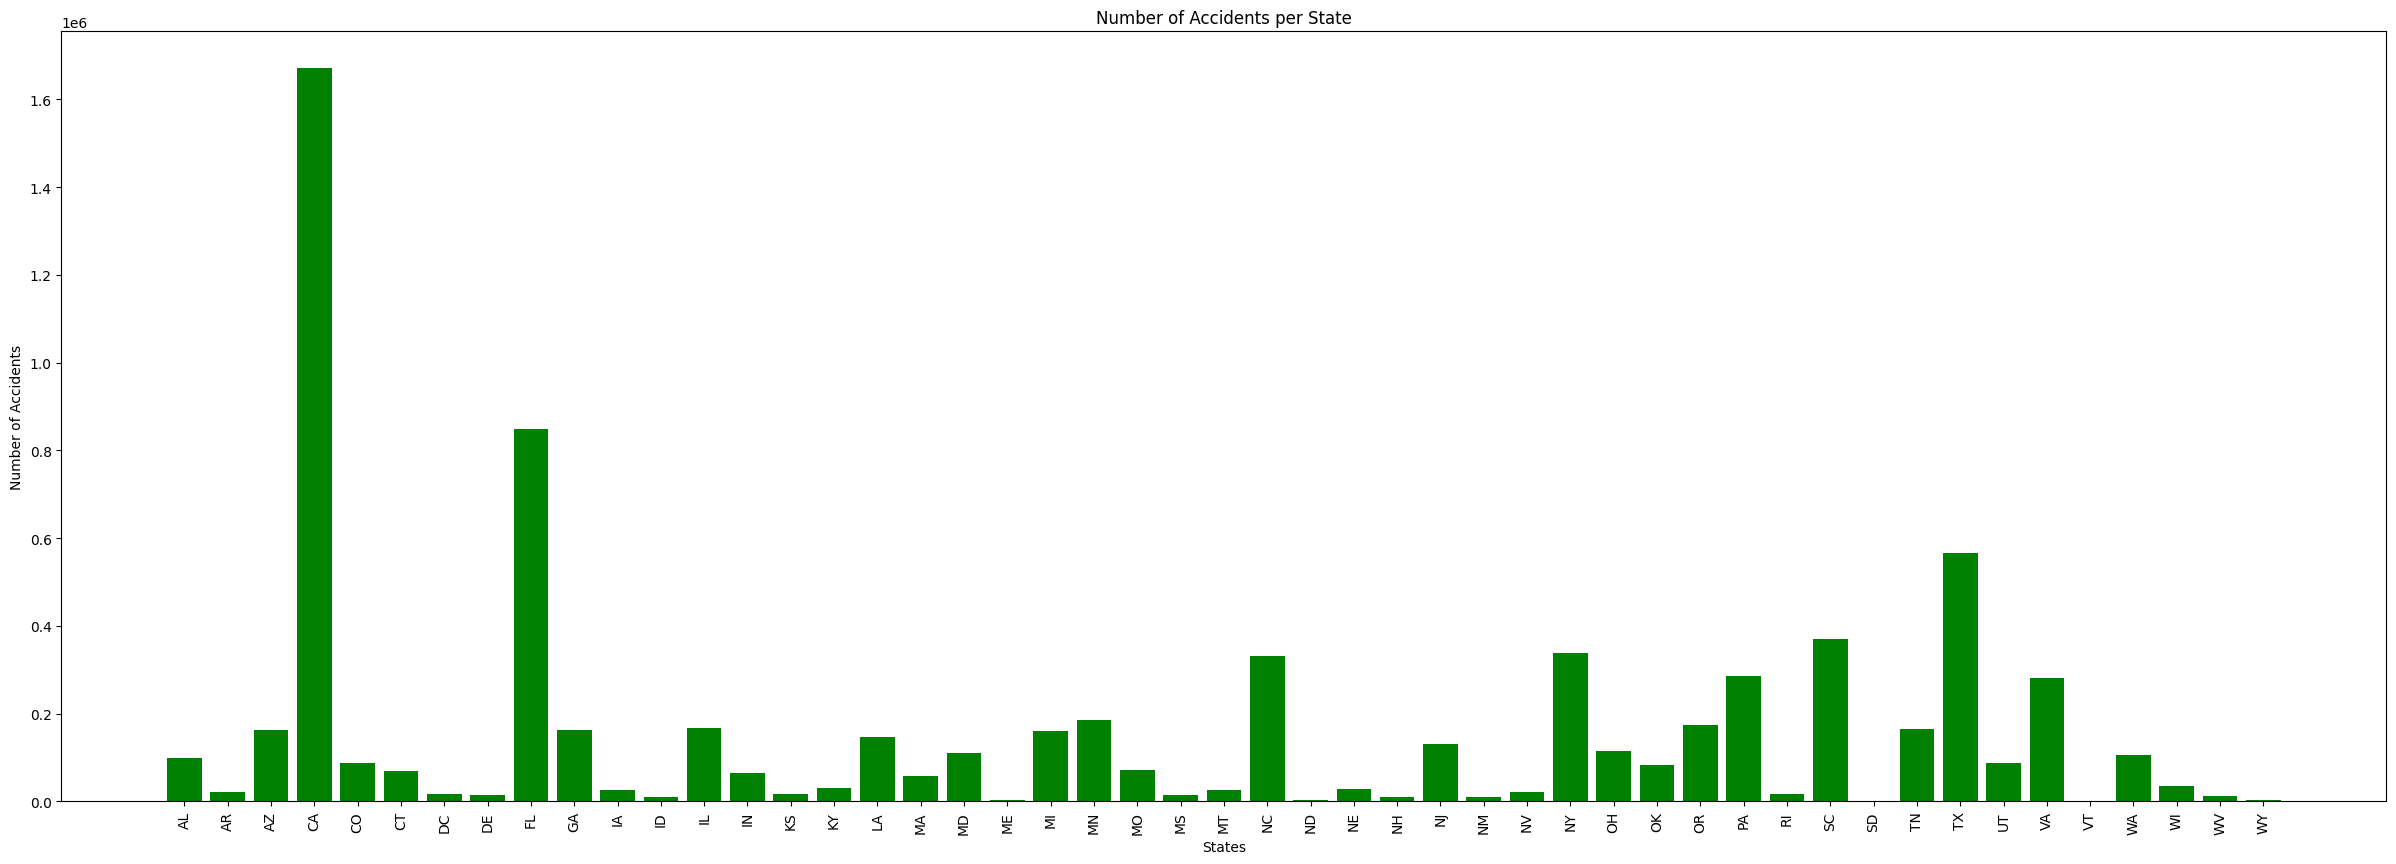

In [ ]:
plt.figure(figsize=(30, 10))
plt.title('Number of Accidents per State')
plt.bar(State.index, State.ID, color='g')
plt.xlabel('States')
plt.ylabel('Number of Accidents')
plt.xticks(State.index, rotation='vertical', size=10)
plt.show()

In [37]:
print('The State where accidents usually occur the Most in the US? : ',State.ID.idxmax())

The State where accidents usually occur the Most in the US? :  CA


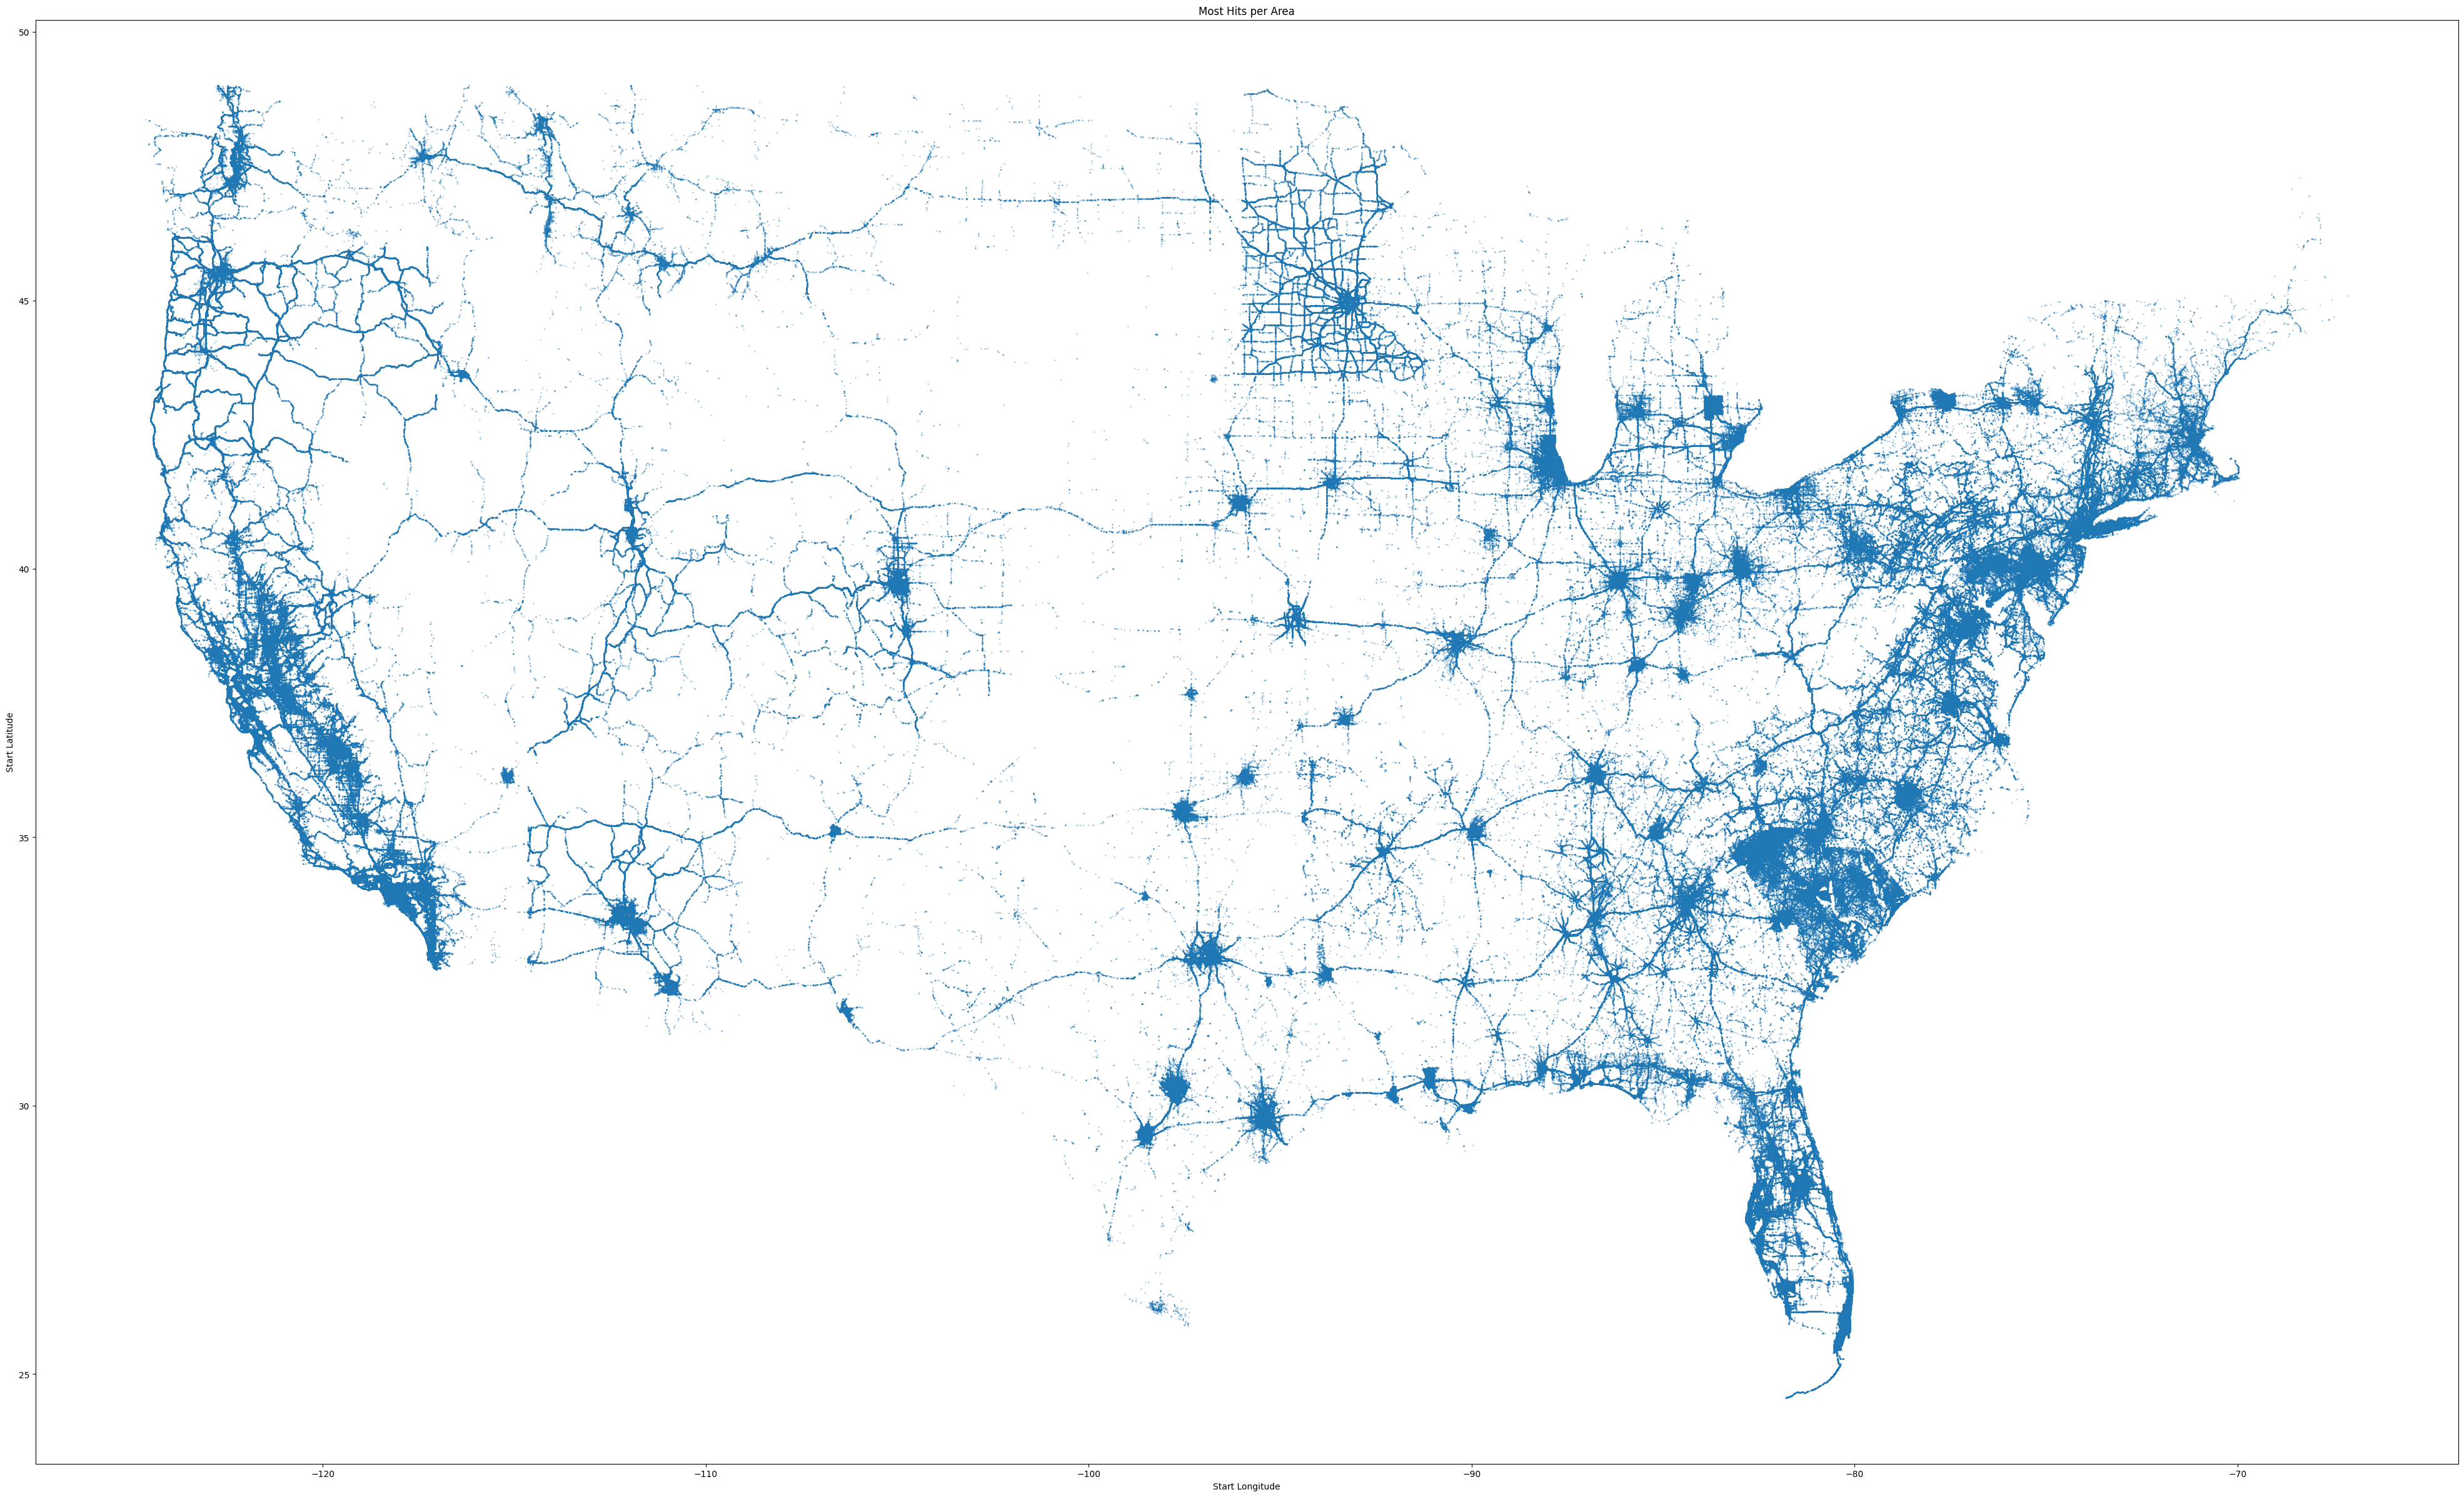

In [ ]:
# let try to plot the Map the Accident accross 49 states on map.


#plotting the Lat against Long could show the map of the area
plt.figure(figsize=(50,30))
plt.title('Most Hits per Area')
plt.xlabel('Start Longitude')
plt.ylabel('Start Latitude')
plt.plot(df.Start_Lng, df.Start_Lat, ".", alpha=0.5, ms=1)
plt.show()

Text(0.5, 1.0, 'Severity-wise Map of Accidents across US')

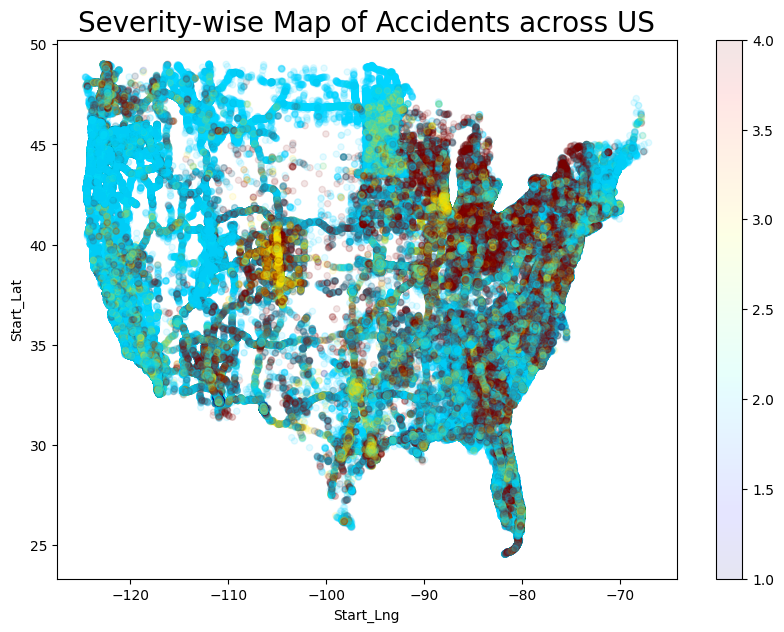

In [39]:
colors = ['red' ,'blue', 'green', 'black','orange']
df.plot(kind="scatter",x="Start_Lng",y="Start_Lat",alpha=0.1,c=df["Severity"],cmap=plt.get_cmap("jet"),colorbar=True,figsize=(10,7))
plt.title("Severity-wise Map of Accidents across US", fontsize=20)

Analysis of Accident Number Per County

In [ ]:
Country = df.groupby('County').count()
Country

ID  Source  Severity  Start_Time  End_Time  Start_Lat  \
County                                                                
Abbeville   1116    1116      1116        1116      1116       1116   
Acadia       331     331       331         331       331        331   
Accomack     568     568       568         568       568        568   
Ada         5278    5278      5278        5278      5278       5278   
Adair        402     402       402         402       402        402   
...          ...     ...       ...         ...       ...        ...   
Yolo        8645    8645      8645        8645      8645       8645   
York       33145   33145     33145       33145     33145      33145   
Young          4       4         4           4         4          4   
Yuba        4482    4482      4482        4482      4482       4482   
Yuma         782     782       782         782       782        782   

           Start_Lng  Distance(mi)  Description  Street  ...  Traffic_Signal  \
County                                                   ...                   
Abbeville       1116          1116         1116    1116  ...            1116   
Acadia           331           331          331     331  ...             331   
Accomack         568           568          568     568  ...             568   
Ada             5278          5278         5278    5278  ...            5278   
Adair            402           402          402     402  ...             402   
...              ...           ...          ...     ...  ...             ...   
Yolo            8645          8645         8645    8645  ...            8645   
York           33145         33145        33145   33145  ...           33145   
Young              4             4            4       4  ...               4   
Yuba            4482          4482         4482    4482  ...            4482   
Yuma             782           782          782     782  ...             782   

           Turning_Loop  Sunrise_Sunset  Civil_Twilight  Nautical_Twilight  \
County                                                                       
Abbeville          1116            1116            1116               1116   
Acadia              331             331             331                331   
Accomack            568             568             568                568   
Ada                5278            5278            5278               5278   
Adair               402             402             402                402   
...                 ...             ...             ...                ...   
Yolo               8645            8645            8645               8645   
York              33145           33145           33145              33145   
Young                 4               4               4                  4   
Yuba               4482            4482            4482               4482   
Yuma                782             782             782                782   

           Astronomical_Twilight    day  weekday  month   hour  
County                                                          
Abbeville                   1116   1116     1116   1116   1116  
Acadia                       331    331      331    331    331  
Accomack                     568    568      568    568    568  
Ada                         5278   5278     5278   5278   5278  
Adair                        402    402      402    402    402  
...                          ...    ...      ...    ...    ...  
Yolo                        8645   8645     8645   8645   8645  
York                       33145  33145    33145  33145  33145  
Young                          4      4        4      4      4  
Yuba                        4482   4482     4482   4482   4482  
Yuma                         782    782      782    782    782  

[1813 rows x 47 columns]

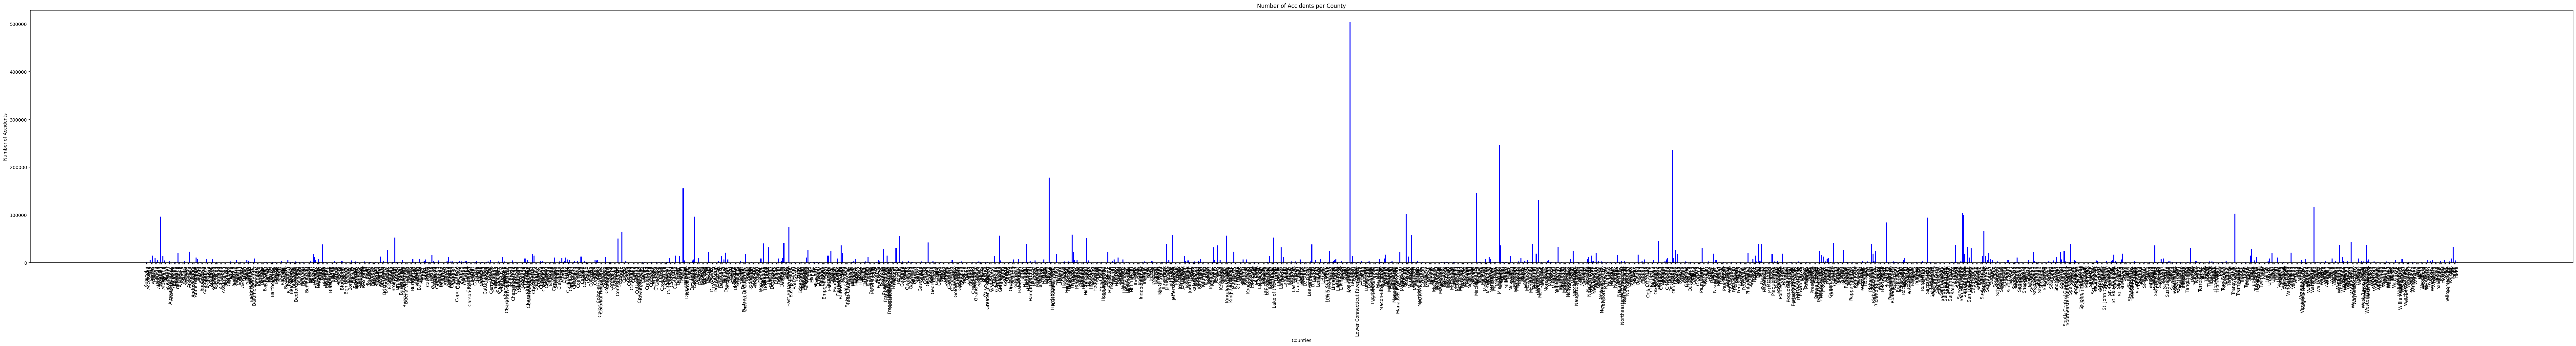

In [ ]:
plt.figure(figsize=(100, 10))
plt.title('Number of Accidents per County')
plt.bar(Country.index, Country.ID, color='b')
plt.xlabel('Counties')
plt.ylabel('Number of Accidents')
plt.xticks(Country.index, rotation='vertical', size=10)
plt.show()

In [42]:
print('The County where accidents usually occur the Most in the US? : ',Country.ID.idxmax())


The County where accidents usually occur the Most in the US? :  Los Angeles


Lastrly lets try to find out the columns which are effecting the Accident Severity

In [44]:
# we wil try to bring the data set into the desired format for this conclusion.

colsToDelete = ['ID', 'Source', 'Start_Time', 'End_Time', 'Description', 'Street', 'City', 'County', 'State',
                'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp']
data = df.drop(colsToDelete, axis=1).dropna()
data.to_csv('cleaned.csv')
data.head()

Severity  Start_Lat  Start_Lng  Distance(mi)  Temperature(F)  \
0         3  39.865147 -84.058723          0.01            36.9   
1         2  39.928059 -82.831184          0.01            37.9   
2         2  39.063148 -84.032608          0.01            36.0   
3         3  39.747753 -84.205582          0.01            35.1   
4         2  39.627781 -84.188354          0.01            36.0   

   Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi) Wind_Direction  \
0      58.251048         91.0         29.68            10.0           Calm   
1      58.251048        100.0         29.65            10.0           Calm   
2      33.300000        100.0         29.67            10.0             SW   
3      31.000000         96.0         29.64             9.0             SW   
4      33.300000         89.0         29.65             6.0             SW   

   ...  Traffic_Signal  Turning_Loop Sunrise_Sunset  Civil_Twilight  \
0  ...           False         False          Night           Night   
1  ...           False         False          Night           Night   
2  ...            True         False          Night           Night   
3  ...           False         False          Night             Day   
4  ...            True         False            Day             Day   

   Nautical_Twilight  Astronomical_Twilight  day  weekday  month  hour  
0              Night                  Night    8        0      2     5  
1              Night                    Day    8        0      2     6  
2                Day                    Day    8        0      2     6  
3                Day                    Day    8        0      2     7  
4                Day                    Day    8        0      2     7  

[5 rows x 34 columns]

In [ ]:
# listing all the unique values for the columns which are categorical in nature.
WindDirections        = list( data["Wind_Direction"].unique() )
WeatherConditions     = list( data["Weather_Condition"].unique() )
SunriseSunsets        = list( data["Sunrise_Sunset"].unique() )
CivilTwilights        = list( data["Civil_Twilight"].unique() )
NauticalTwilights     = data["Nautical_Twilight"].unique()
AstronomicalTwilights = data["Astronomical_Twilight"].unique()

def findIndex(x, lst=[]):
    for i in range(len(lst)):
        if(lst[i]==x):
            return i

In [46]:
# Transforming the categorical columns to numerical columns.

for i in WindDirections:
    data["Wind_Direction"][ data["Wind_Direction"]==i ] = findIndex(i, WindDirections)
for i in WeatherConditions:
    data["Weather_Condition"][ data["Weather_Condition"]==i ] = findIndex(i, WeatherConditions)
for i in SunriseSunsets:
    data["Sunrise_Sunset"][ data["Sunrise_Sunset"]==i ] = findIndex(i, SunriseSunsets)
for i in CivilTwilights:
    data["Civil_Twilight"][ data["Civil_Twilight"]==i ] = findIndex(i, CivilTwilights)
for i in NauticalTwilights:
    data["Nautical_Twilight"][ data["Nautical_Twilight"]==i ] = findIndex(i, NauticalTwilights)
for i in AstronomicalTwilights:
    data["Astronomical_Twilight"][ data["Astronomical_Twilight"]==i ] = findIndex(i, AstronomicalTwilights)

data.head()

C:\Users\Shubh\AppData\Local\Temp\ipykernel_28060\4052315427.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data["Wind_Direction"][ data["Wind_Direction"]==i ] = findIndex(i, WindDirections)
C:\Users\Shubh\AppData\Local\Temp\ipykernel_2

Severity  Start_Lat  Start_Lng  Distance(mi)  Temperature(F)  \
0         3  39.865147 -84.058723          0.01            36.9   
1         2  39.928059 -82.831184          0.01            37.9   
2         2  39.063148 -84.032608          0.01            36.0   
3         3  39.747753 -84.205582          0.01            35.1   
4         2  39.627781 -84.188354          0.01            36.0   

   Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi) Wind_Direction  \
0      58.251048         91.0         29.68            10.0              0   
1      58.251048        100.0         29.65            10.0              0   
2      33.300000        100.0         29.67            10.0              1   
3      31.000000         96.0         29.64             9.0              1   
4      33.300000         89.0         29.65             6.0              1   

   ...  Traffic_Signal  Turning_Loop Sunrise_Sunset  Civil_Twilight  \
0  ...           False         False              0               0   
1  ...           False         False              0               0   
2  ...            True         False              0               0   
3  ...           False         False              0               1   
4  ...            True         False              1               1   

   Nautical_Twilight  Astronomical_Twilight  day  weekday  month  hour  
0                  0                      0    8        0      2     5  
1                  0                      1    8        0      2     6  
2                  1                      1    8        0      2     6  
3                  1                      1    8        0      2     7  
4                  1                      1    8        0      2     7  

[5 rows x 34 columns]

In [47]:
cols = ["Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station",
        "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop"]
for column in cols:
    lst = []
    for i in data[column]:
        lst.append(1 if(i) else 0)
    data[column] = lst
data.to_csv('features.csv')
data.head()

Severity  Start_Lat  Start_Lng  Distance(mi)  Temperature(F)  \
0         3  39.865147 -84.058723          0.01            36.9   
1         2  39.928059 -82.831184          0.01            37.9   
2         2  39.063148 -84.032608          0.01            36.0   
3         3  39.747753 -84.205582          0.01            35.1   
4         2  39.627781 -84.188354          0.01            36.0   

   Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi) Wind_Direction  \
0      58.251048         91.0         29.68            10.0              0   
1      58.251048        100.0         29.65            10.0              0   
2      33.300000        100.0         29.67            10.0              1   
3      31.000000         96.0         29.64             9.0              1   
4      33.300000         89.0         29.65             6.0              1   

   ...  Traffic_Signal  Turning_Loop Sunrise_Sunset  Civil_Twilight  \
0  ...               0             0              0               0   
1  ...               0             0              0               0   
2  ...               1             0              0               0   
3  ...               0             0              0               1   
4  ...               1             0              1               1   

   Nautical_Twilight  Astronomical_Twilight  day  weekday  month  hour  
0                  0                      0    8        0      2     5  
1                  0                      1    8        0      2     6  
2                  1                      1    8        0      2     6  
3                  1                      1    8        0      2     7  
4                  1                      1    8        0      2     7  

[5 rows x 34 columns]

In [48]:
data = data.astype("float")

In [49]:
lat = data["Start_Lat"]
lng = data["Start_Lng"]
X   = data.drop(["Start_Lat", "Start_Lng"], axis=1)

X.head()

Severity  Distance(mi)  Temperature(F)  Wind_Chill(F)  Humidity(%)  \
0       3.0          0.01            36.9      58.251048         91.0   
1       2.0          0.01            37.9      58.251048        100.0   
2       2.0          0.01            36.0      33.300000        100.0   
3       3.0          0.01            35.1      31.000000         96.0   
4       2.0          0.01            36.0      33.300000         89.0   

   Pressure(in)  Visibility(mi)  Wind_Direction  Wind_Speed(mph)  \
0         29.68            10.0             0.0          7.68549   
1         29.65            10.0             0.0          7.68549   
2         29.67            10.0             1.0          3.50000   
3         29.64             9.0             1.0          4.60000   
4         29.65             6.0             1.0          3.50000   

   Precipitation(in)  ...  Traffic_Signal  Turning_Loop  Sunrise_Sunset  \
0           0.020000  ...             0.0           0.0             0.0   
1           0.000000  ...             0.0           0.0             0.0   
2           0.008407  ...             1.0           0.0             0.0   
3           0.008407  ...             0.0           0.0             0.0   
4           0.008407  ...             1.0           0.0             1.0   

   Civil_Twilight  Nautical_Twilight  Astronomical_Twilight  day  weekday  \
0             0.0                0.0                    0.0  8.0      0.0   
1             0.0                0.0                    1.0  8.0      0.0   
2             0.0                1.0                    1.0  8.0      0.0   
3             1.0                1.0                    1.0  8.0      0.0   
4             1.0                1.0                    1.0  8.0      0.0   

   month  hour  
0    2.0   5.0  
1    2.0   6.0  
2    2.0   6.0  
3    2.0   7.0  
4    2.0   7.0  

[5 rows x 32 columns]

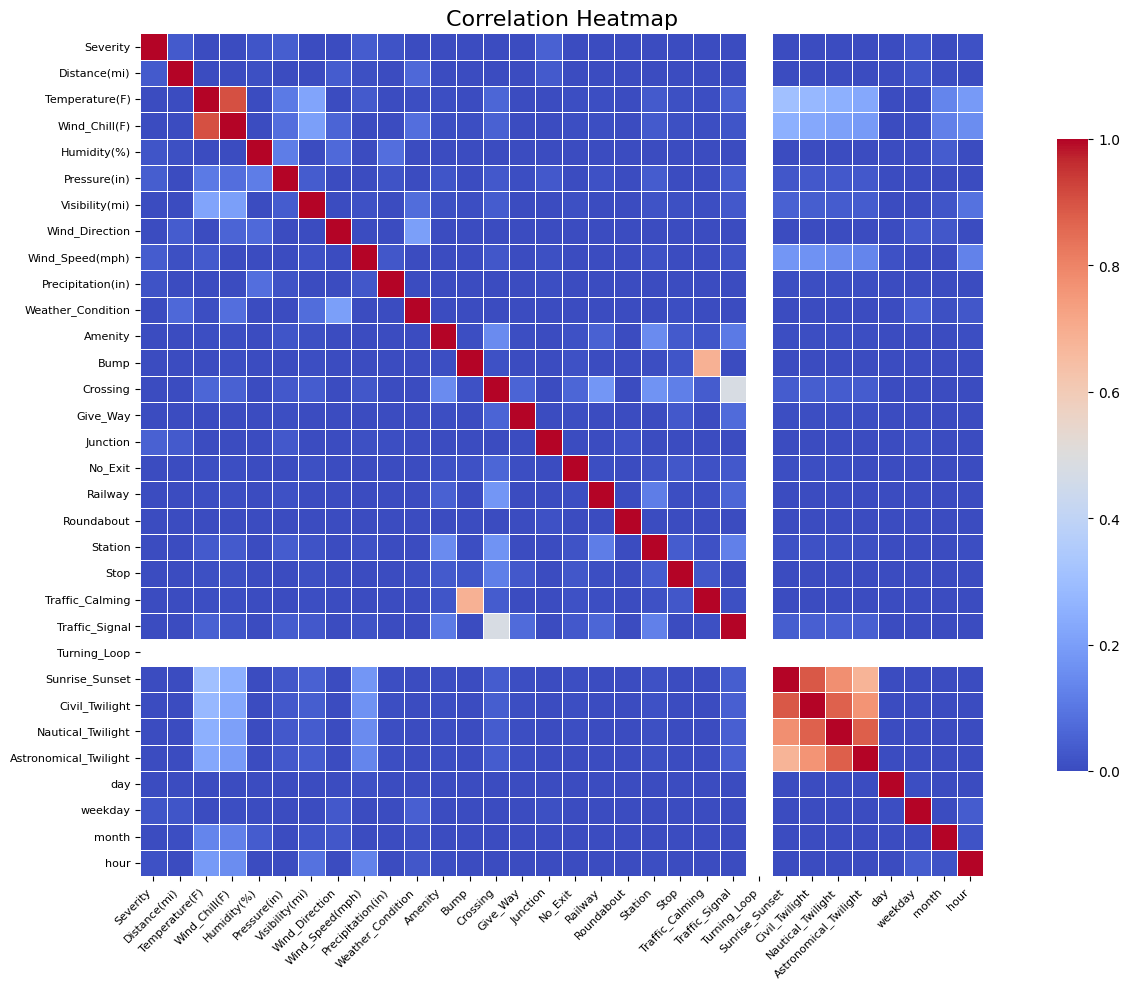

In [59]:
# we will try to plot the correlation matrix for the data set. showing 
corr_matrix = X.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(
    corr_matrix,
    fmt=".2f",  
    cmap="coolwarm", 
    vmin=0, vmax=1,
    square=True, 
    linewidths=0.5,  
    cbar_kws={"shrink": 0.75},  
)

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(fontsize=8, rotation=45, ha="right")
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

Now we will finally prepare our Machine learning for out data set tring to predict the Severity of the datset.

In [ ]:
# getting them all in the correct format for this model.
df.head()

ID   Source  Severity          Start_Time            End_Time  Start_Lat  \
0  A-1  Source2         3 2016-02-08 05:46:00 2016-02-08 11:00:00  39.865147   
1  A-2  Source2         2 2016-02-08 06:07:59 2016-02-08 06:37:59  39.928059   
2  A-3  Source2         2 2016-02-08 06:49:27 2016-02-08 07:19:27  39.063148   
3  A-4  Source2         3 2016-02-08 07:23:34 2016-02-08 07:53:34  39.747753   
4  A-5  Source2         2 2016-02-08 07:39:07 2016-02-08 08:09:07  39.627781   

   Start_Lng  Distance(mi)                                        Description  \
0 -84.058723          0.01  Right lane blocked due to accident on I-70 Eas...   
1 -82.831184          0.01  Accident on Brice Rd at Tussing Rd. Expect del...   
2 -84.032608          0.01  Accident on OH-32 State Route 32 Westbound at ...   
3 -84.205582          0.01  Accident on I-75 Southbound at Exits 52 52B US...   
4 -84.188354          0.01  Accident on McEwen Rd at OH-725 Miamisburg Cen...   

                      Street  ... Traffic_Signal Turning_Loop Sunrise_Sunset  \
0                     I-70 E  ...          False        False          Night   
1                   Brice Rd  ...          False        False          Night   
2             State Route 32  ...           True        False          Night   
3                     I-75 S  ...          False        False          Night   
4  Miamisburg Centerville Rd  ...           True        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight day weekday  month  \
0          Night             Night                 Night   8       0      2   
1          Night             Night                   Day   8       0      2   
2          Night               Day                   Day   8       0      2   
3            Day               Day                   Day   8       0      2   
4            Day               Day                   Day   8       0      2   

   hour  
0     5  
1     6  
2     6  
3     7  
4     7  

[5 rows x 48 columns]

In [68]:
# As we early extracted the information from the Start_time and End_time, we will drop them now.
df = df.drop(columns = ['Start_Time', 'End_Time'])

# the columns like ID and Source are not useful for the model, so we will drop them. We will also removce the Description column as it is not useful for the model and will overcomplicate the process of model making.
df = df.drop(columns = ['ID', 'Source', 'Description'])

df.head()

Severity  Start_Lat  Start_Lng  Distance(mi)  \
0         3  39.865147 -84.058723          0.01   
1         2  39.928059 -82.831184          0.01   
2         2  39.063148 -84.032608          0.01   
3         3  39.747753 -84.205582          0.01   
4         2  39.627781 -84.188354          0.01   

                                         Description  \
0  Right lane blocked due to accident on I-70 Eas...   
1  Accident on Brice Rd at Tussing Rd. Expect del...   
2  Accident on OH-32 State Route 32 Westbound at ...   
3  Accident on I-75 Southbound at Exits 52 52B US...   
4  Accident on McEwen Rd at OH-725 Miamisburg Cen...   

                      Street          City      County State     Zipcode  ...  \
0                     I-70 E        Dayton  Montgomery    OH       45424  ...   
1                   Brice Rd  Reynoldsburg    Franklin    OH  43068-3402  ...   
2             State Route 32  Williamsburg    Clermont    OH       45176  ...   
3                     I-75 S        Dayton  Montgomery    OH       45417  ...   
4  Miamisburg Centerville Rd        Dayton  Montgomery    OH       45459  ...   

  Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \
0          False        False          Night          Night   
1          False        False          Night          Night   
2           True        False          Night          Night   
3          False        False          Night            Day   
4           True        False            Day            Day   

   Nautical_Twilight  Astronomical_Twilight  day  weekday  month hour  
0              Night                  Night    8        0      2    5  
1              Night                    Day    8        0      2    6  
2                Day                    Day    8        0      2    6  
3                Day                    Day    8        0      2    7  
4                Day                    Day    8        0      2    7  

[5 rows x 44 columns]

Just like for heat map, here also we will parpare the dataset, where we will convert the categorical columns into numerical columns.

In [74]:
colsToDelete = ['Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp']
df = df.drop(colsToDelete, axis=1).dropna()
df.head()

Severity  Start_Lat  Start_Lng  Distance(mi)                     Street  \
0         3  39.865147 -84.058723          0.01                     I-70 E   
1         2  39.928059 -82.831184          0.01                   Brice Rd   
2         2  39.063148 -84.032608          0.01             State Route 32   
3         3  39.747753 -84.205582          0.01                     I-75 S   
4         2  39.627781 -84.188354          0.01  Miamisburg Centerville Rd   

           City      County State  Temperature(F)  Wind_Chill(F)  ...  \
0        Dayton  Montgomery    OH            36.9      58.251048  ...   
1  Reynoldsburg    Franklin    OH            37.9      58.251048  ...   
2  Williamsburg    Clermont    OH            36.0      33.300000  ...   
3        Dayton  Montgomery    OH            35.1      31.000000  ...   
4        Dayton  Montgomery    OH            36.0      33.300000  ...   

   Traffic_Signal  Turning_Loop  Sunrise_Sunset Civil_Twilight  \
0           False         False           Night          Night   
1           False         False           Night          Night   
2            True         False           Night          Night   
3           False         False           Night            Day   
4            True         False             Day            Day   

   Nautical_Twilight  Astronomical_Twilight day  weekday  month  hour  
0              Night                  Night   8        0      2     5  
1              Night                    Day   8        0      2     6  
2                Day                    Day   8        0      2     6  
3                Day                    Day   8        0      2     7  
4                Day                    Day   8        0      2     7  

[5 rows x 38 columns]

In [75]:
# listing all the unique values for the columns which are categorical in nature.
WindDirections        = list( df["Wind_Direction"].unique() )
WeatherConditions     = list( df["Weather_Condition"].unique() )
SunriseSunsets        = list( df["Sunrise_Sunset"].unique() )
CivilTwilights        = list( df["Civil_Twilight"].unique() )
NauticalTwilights     = df["Nautical_Twilight"].unique()
AstronomicalTwilights = df["Astronomical_Twilight"].unique()


def findIndex(x, lst=[]):
    for i in range(len(lst)):
        if(lst[i]==x):
            return i

In [ ]:
# Transforming the categorical columns to numerical columns.

for i in WindDirections:
    df["Wind_Direction"][ df["Wind_Direction"]==i ] = findIndex(i, WindDirections)
for i in WeatherConditions:
    df["Weather_Condition"][ df["Weather_Condition"]==i ] = findIndex(i, WeatherConditions)
for i in SunriseSunsets:
    df["Sunrise_Sunset"][ df["Sunrise_Sunset"]==i ] = findIndex(i, SunriseSunsets)
for i in CivilTwilights:
    df["Civil_Twilight"][ df["Civil_Twilight"]==i ] = findIndex(i, CivilTwilights)
for i in NauticalTwilights:
    df["Nautical_Twilight"][ df["Nautical_Twilight"]==i ] = findIndex(i, NauticalTwilights)
for i in AstronomicalTwilights:
    df["Astronomical_Twilight"][ df["Astronomical_Twilight"]==i ] = findIndex(i, AstronomicalTwilights)


df.head()

In [ ]:
cols = ["Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station",
        "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop"]
for column in cols:
    lst = []
    for i in data[column]:
        lst.append(1 if(i) else 0)
    data[column] = lst
data.to_csv('features.csv')
data.head()

In [ ]:
# let list down the name of the attributes.
col_names = df.columns.tolist()
index = df.index
for i in col_names:
  print(i, type(i))

In [ ]:
#split dataset in features and target variable. here we will try to only take the columns that are useful for the model.
feature_cols = ['Start_Lat',
                'Start_Lng',
                'Distance(mi)',
                'Temperature(F)',
                'Wind_Chill(F)',
                'Humidity(%)',
                'Pressure(in)',
                'Visibility(mi)',
                'Wind_Direction',
                'Wind_Speed(mph)',
                'Precipitation(in)',
                'Weather_Condition',
                'Amenity',
                'Bump',
                'Crossing',
                'Give_Way',
                'Junction',
                'No_Exit','Railway',
                'Roundabout','Station',
                'Stop','Traffic_Calming',
                'Traffic_Signal',
                'Turning_Loop',
                'Sunrise_Sunset',
                'Civil_Twilight',
                'Nautical_Twilight',
                'Astronomical_Twilight']

X = df[feature_cols] # Features
y = df.Severity

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
# building the model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()